# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries

In [2688]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

In [2689]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)


# Library to split the data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")



**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Loading the dataset

In [2692]:
#loading and reading the required dataset into Dataframe from jupyter notebook
hotel_df = pd.read_csv('INNHotelsGroup.csv') 


#### Make a copy of dataset

In [2694]:
#make a copy of dataset
Hotel_df_copy=hotel_df.copy()

- *It's always a good practice to make a copy of datasets before doing any analysis.*

## Data Overview

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape/datatypes etc of the dataset
  - Getting the statistical summary for the variables
  - Check for missing values
  - Check for duplicates

#### Displaying the first 5 rows of the dataset

In [2699]:
#read first 5 dataset using head() function
hotel_df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

#### Displaying the last 5 rows of the dataset

In [2701]:
#read last 5 dataset using tail() function
hotel_df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

#### Displaying random 5 rows of the dataset

In [2703]:
hotel_df.sample(n=5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
9846    INN09847             1               0                     0   
5727    INN05728             2               2                     2   
9171    INN09172             1               0                     1   
32381   INN32382             2               0                     0   
9836    INN09837             2               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
9846                   2       Meal Plan 1                           0   
5727                   1       Meal Plan 1                           0   
9171                   2       Meal Plan 1                           0   
32381                  4       Meal Plan 1                           0   
9836                   2      Not Selected                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
9846         Room_Type 1        188          2018              6   
5727         Room_Type 6          4          2017              9   
9171         Room_Type 1        219          2017              9   
32381        Room_Type 1         19          2017             10   
9836         Room_Type 1        102          2018             10   

       arrival_date market_segment_type  repeated_guest  \
9846             15             Offline               0   
5727             13              Online               0   
9171              4             Offline               0   
32381            13              Online               0   
9836             30              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
9846                              0                                     0   
5727                              0                                     0   
9171                              0                                     0   
32381                             0                                     0   
9836                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
9846            130.00000                       0       Canceled  
5727            186.33000                       1   Not_Canceled  
9171             76.67000                       0   Not_Canceled  
32381           126.00000                       1   Not_Canceled  
9836             79.65000                       0       Canceled

`sample(n=5) ` function will display any randomly selected 5 rows of the dataset here, instead of fetching first 5 or last 5 rows using head() and tail() functions respectively.

#### Checking the shape of dataset

In [2706]:
hotel_df.shape
print('The dataset INN Hotel contains', hotel_df.shape[0], 'rows and', hotel_df.shape[1],' columns')

The dataset INN Hotel contains 36275 rows and 19  columns


- *There are 36275  rows and 19 columns present in the given dataset(INN Hotel).*

#### Checking the data types of the columns

In [2709]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### Observation:

- *There are `36275 rows and 19 columns` present in the given dataset.*
- *The dataset contains total of `19 columns` of datatypes `float(1)`,`Integer(13)` and `object(5)`.*
  
- *There are `14 columns` which are `numerical` in nature, the columns `no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests ` are stored as `int` while `avg_price_per_room` is stored as `float` as price requires decimal placing*.
  
- *The columns `Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type and booking_status` are catogorical data and stored as object(string).*
  
- *There are `36275 non-null` values in `all 19 columns` indicating `no missing values`.*

**basic functions to calculate/display value_counts, value_count percentwise for selected columns**

In [2712]:
#basic functions to calculate/display value_counts, value_count percentwise for selected categorical columns
def basic_checks(df,cols_name):
    for cols in cols_name:
        cols_value_count=df[cols].value_counts()                 #calculate value_counts for selected categorical columns
        cols_value_perc= df[cols].value_counts(normalize=True)   #calculate value_counts percentwise for selected categorical columns

        #print the results
        print(50 * '-')
        print('Display value counts for column:',cols)          
        print(50 * '-')
        print(cols_value_count)
        print(50 * '-')
        print('Display value percentage for column:',cols)
        print(50 * '-')
        print(round(cols_value_perc*100),2)

In [2713]:
cols_num=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights',
          'required_car_parking_space','lead_time', 'arrival_year','arrival_month',
          'arrival_date','repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']
cols_cat=['type_of_meal_plan','room_type_reserved', 'market_segment_type' ,'booking_status']
          

In [2714]:
basic_checks(hotel_df,cols_num)

--------------------------------------------------
Display value counts for column: no_of_adults
--------------------------------------------------
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
--------------------------------------------------
Display value percentage for column: no_of_adults
--------------------------------------------------
no_of_adults
2   72.00000
1   21.00000
3    6.00000
0    0.00000
4    0.00000
Name: proportion, dtype: float64 2
--------------------------------------------------
Display value counts for column: no_of_children
--------------------------------------------------
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
--------------------------------------------------
Display value percentage for column: no_of_children
--------------------------------------------------
no_of_children
0    93.00000
1     4.00000
2     3.00000
3     0.00000
9    

In [2715]:
basic_checks(hotel_df,cols_cat) #categorical columns

--------------------------------------------------
Display value counts for column: type_of_meal_plan
--------------------------------------------------
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--------------------------------------------------
Display value percentage for column: type_of_meal_plan
--------------------------------------------------
type_of_meal_plan
Meal Plan 1    77.00000
Not Selected   14.00000
Meal Plan 2     9.00000
Meal Plan 3     0.00000
Name: proportion, dtype: float64 2
--------------------------------------------------
Display value counts for column: room_type_reserved
--------------------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--------------------------------------------------
Display valu

#### Statistical summary of the dataset

- *The `describe()` function will display the summary statistics of the numerical data. To view summary statistics of both numerical and categorical data we use describe(include='all')*.

In [2718]:
hotel_df.describe(include='all').T

count unique           top   freq  \
Booking_ID                                 36275  36275      INN00001      1   
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
Booking_ID                                  NaN      NaN        NaN   
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
Booking_ID                                  NaN        NaN        NaN   
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   

**Statistical observations:**

- *`Booking_ID`:It's a unique id for each booking.The dataset has information about `36275` bookings done in INN Hotels.*
- *`no_of_adults`:On an average the customer book the rooms for `2 adults (mean=1.84)` and `maximum` number can go upto `4` adults. We can also see few bookings with `0 adults`, which seems to be a system error or special accommodation request for minors with parental consent for group activities.*
- *`no_of_children`:The minimum and maximum number of children stay in a Hotel are `0` and `10` respectively. On an average there is one children included in the booking.*
- *`no_of_weekend_nights`: 75% of booking are done for 2 weekend nights(i.e Saturday and Sunday) with maximum of `7`(probably 7 nights stay including sat & sun).*
  
- *`no_of_week_nights`:On an average customer books the room for approx 2 nights(mean =2.2), with 75% of booking are done for 3 night and maximum of 17 days*
- *`type_of_meal_plan`:There are `4 category for meal-plans selection`.Customer have option to choose any meal plans that include(breakfast/lunch or dinner or combo) or can skip any meal plan. `Meal plan 1( i.e Breakfast )` is the most selected one `(78%)`.*
  
- *`required_car_parking_space:` `97 percent` of customer have `not requested for car space` while booking the rooms. This is a categorical data having 2 unique value `yes or no`, but listed as number (int) for building model*
  
- *`room_type_reserved`:The Hotel provides `7 different types` of rooms, with `Room_Type 1` is the most preffered one `(78%)`.*
  
- *`lead_time`:On an average the `lead time(i.e advance booking)` is `around 85 days`. `50 percent` of customer books the room `57 days` in advance which can go as `high as 443 days`(i.e more than an year), suggesting some outliers at higher end.*
  
- *`arrival_year`: The Hotel dataset has booking reservation made between 2017 to 2018.*
  
- *`arrival_month`: It's a `date field` and looking at month count, most of the booking are done in the `month of October(15 %) followed by september (13 %)`.*
  
- *`arrival_date`: It's a `customer arrival date` and again a `date field`, better insight can be obtained through visualization.*
- *`market_segment_type`: There are 5 different market segment `Online,Offline,Corporate,Complementary and Aviation and looks like most of the bookings are done through `online (64%) followed by offline(29%)`*
  
- *`repeated_guest`: `97 percent` of customers are the `new customers` booking for first time.*
  
- *`no_of_previous_cancellations`:The `maximum` number of previous booking cancelled by the customer prior to current booking is `13` while mininum is `0 cancellation`. 75% of booking is not cancelled prior to current booking*.
  
- *`no_of_previous_bookings_not_canceled`: The `maximum` number of previous booking not cancelled by the Customer is `58`,the higher previous booking rate  suggests corporate or business trips*.
  
- *`avg_price_per_room`: The average price of a room is around `103.42 euros` approx and can as `low as 80.3` and `high as 540.00 euros`, indicating outliers at higher end due to dynamic pricing and rises during the peak season*.
  
- *`no_of_special_requests`: The maximum number of request made by any customers are `5`.`55% of customers` have booked the room without any special request, while `31 % of customers` have made `one` request.*
  
- *`booking_status`:There are `2 unique` value for booking_status `Canceled and Not_Canceled`.Out of 36375 booking, `24390 bookings (i.e. 67%)` are `Not_Canceled`*


#### Check for duplicate data

In [2721]:
hotel_df.duplicated().sum()

0

- *There are `no duplicate entries` present in the given dataset.* 

#### Check for null/missing value

In [2724]:
hotel_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- *There are `no missing values present` in the given dataset*

## Exploratory Data Analysis (EDA)

- *EDA is an important part of any project involving data. It is important to investigate and understand the data better before building a model with it.*


### Univariate Analysis

#### *lets do univariate analysis for below columns:*
1. Booking_ID
2. no_of_adults
3. no_of_children
4. no_of_weekend_nights
5. no_of_week_nights
6. type_of_meal_plan
7. required_car_parking_space
8. room_type_reserved
9. lead_time
10. arrival_year
11. arrival_month
12. arrival_date
13. market_segment_type
14. repeated_guest
15. no_of_previous_cancellations
16. no_of_previous_bookings_not_canceled
17. avg_price_per_room
18. no_of_special_requests
19. booking_status

- *We will not do analysis of `booking_id` as it's `unique identifiers`*

**Lets create a separate functions to plot histogram and boxplot for all the numericals columns and bar plot for categorical columns**

`Numerical columns list`  : lead_time , avg_price_per_room , no_of_previous_cancellations ,  no_of_previous_bookings_not_canceled  <br>

Though no_of_adults, no_of_children , no_of_weekend_nights , no_of_week_nights , required_car_parking_space, repeated_guest , no_of_special_requests  columns are listed as numerical column(datatype=int), they are categorical data and we will treat it as categorical data for visualization.

`Categorical columns list`: type_of_meal_plan , room_type_reserved ,  market_segment_type , booking_status.

        


In [2731]:
#create a function to plot histogram and box plot for numericals columns 
def univariate_analysis_for_numCols(df,column_name, figsize=(15, 10),kde=True):
    """
    Boxplot and histogram combined

    df: dataframe
    column_name: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    
    """
       
        # creating the 2 subplots one for histogram and another for boxplot
          
    f, (ax_hist, ax_box) = plt.subplots(
        nrows=2,                                          # Number of rows of the subplot grid= 2(one for hist and another for box plot)
        sharex=True,                                      # both the subplots will share the same x-axis for same alignment
        gridspec_kw={"height_ratios": (0.75, 0.25)},      # height ratios to ensure histogram (more detailed) get more space compared to box plot. 
        figsize=figsize,
    )  
   
    #create a histplot on first subplot
    ax_hist.set_title(f'Histogram for {column_name}')
    sns.histplot(data = df , x = column_name , ax = ax_hist, color = 'blue' , kde = kde) 
    ax_hist.axvline(df[column_name].mean() , color = 'green', linestyle='--')
    ax_hist.axvline(df[column_name].median() , color = 'black')
                      
    #create boxplot on second subplot
    sns.boxplot(data = df , x = column_name , ax = ax_box, color = 'orange',showmeans = True)
    ax_box.set_title(f'Boxplot for {column_name}')
       

**`lead_time`**

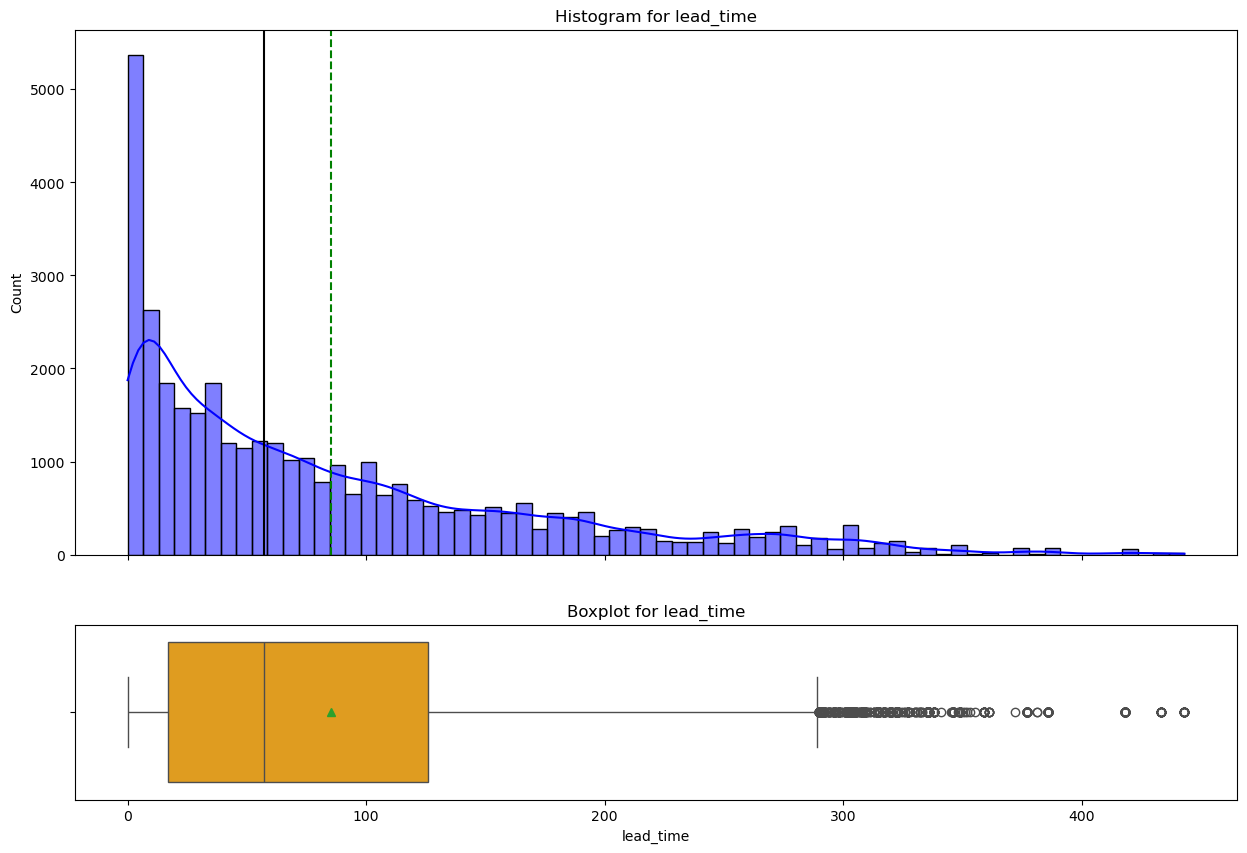

In [2733]:
univariate_analysis_for_numCols(hotel_df,'lead_time', figsize=(15, 10),)

**Observation:**

- *There are `many outliers` present at the `higher end` making the data `heavily right skewed` and suggesting many bookings are done in advance.*
- *The `average lead time` is around `85 days`, which is `higher` than `median` value(around `57 days`).*
- *`50 percent` of middle data (IQR range) are booked with lead time between apprx `17- 126` days.*


**`avg_price_per_room`**

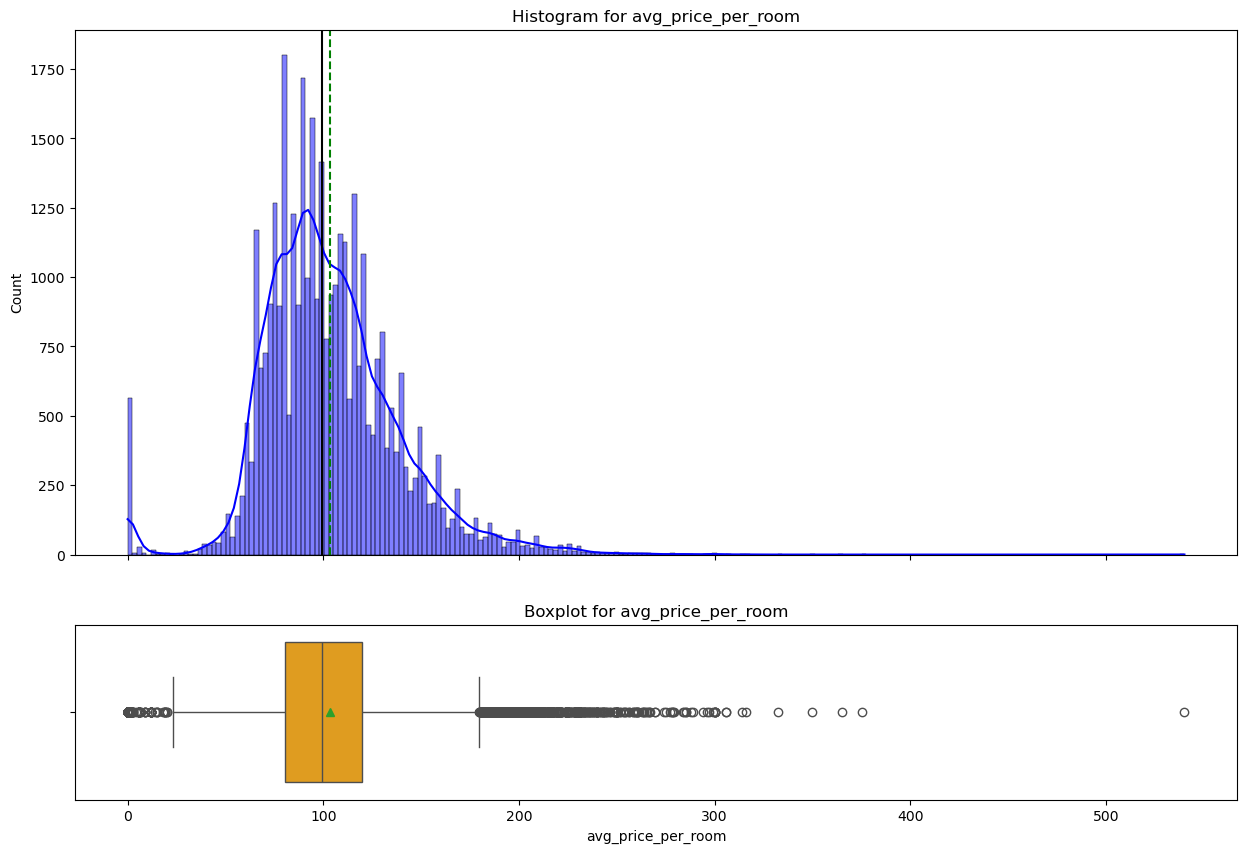

In [2736]:
univariate_analysis_for_numCols(hotel_df,'avg_price_per_room', figsize=(15, 10),)

**Observation:**

- *There are `outliers` present at both ends. Presence of outliers are more on the `higher end` making the data  `right skewed` and slightly left skewed(because of few outliers on lower end). This indicate low and high demands in booking during low and peak season resp.*
- *The `average price per room` and `median` value are almost similar around `101 euros`*
- *The average price per room of middle data(`50 percent` IQR range) i.e lies between apprx `80- 120` euros.*
  
- *There are few prices we can see have `average room price equal to 0 euros`. This can happen when the rooms are booked as a complimentary(with no charges) or a data error entries. Lets check the counts in each segment, to have a better understanding*
- *There is only `one outliers` which has `average room price higher than 500 euros`, which seems to very high with respect to all data. lets treat this outliers*



In [2738]:
#checking the value_counts for average price equal zero
avg_rm_prc_0_cond = hotel_df['avg_price_per_room']==0
avg_rm_prc_0_df = hotel_df[avg_rm_prc_0_cond]


In [2739]:
#Checking the count under diff market segment where average room price is zero
#Method 1- without using loc() fn
hotel_df[avg_rm_prc_0_cond]['market_segment_type'].value_counts()

# Method 2 , using loc() function
hotel_df.loc[avg_rm_prc_0_cond, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

- *There are `354 booking` done under `Complimentary segment` where the average price of a room is zero, which seems to be ok*.
- *When the rooms are booked as a `Online(with no charges)`the count is `191`, which can be due to hotel rewards point redemption/ promotinal/coupon offers and additional information is needed*


**Treating outliers in avg_price_per_room for average price per room greater than 500**

In [2742]:

# Calculating the 25th quantile 
Q1 = hotel_df["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = hotel_df['avg_price_per_room'].quantile(.75)  

# Calculating IQR(inter-quartile range)
IQR = Q3 - Q1

# Calculating value of lower and upper whisker
lower_whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

#print the values
print('lower_Whisker value=',lower_whisker)
print('Upper_Whisker value=',Upper_Whisker)

lower_Whisker value= 20.749999999999993
Upper_Whisker value= 179.55


In [2743]:
# assigning the outliers the value of upper whisker
cond_uppwhisker=hotel_df["avg_price_per_room"] >= 500
hotel_df.loc[cond_uppwhisker, "avg_price_per_room"] = Upper_Whisker

**Let's visualize avg_price_per_room after outliers treatment**

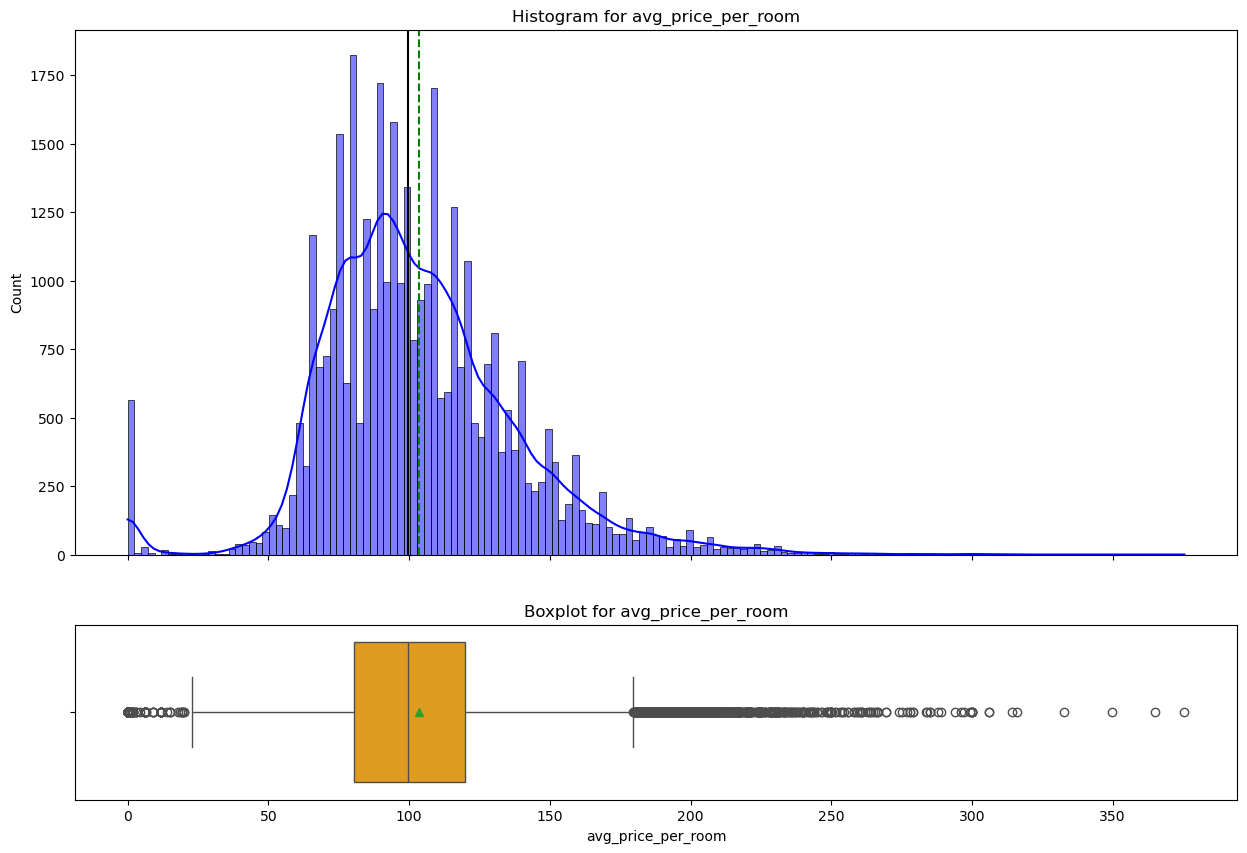

In [2745]:
univariate_analysis_for_numCols(hotel_df,'avg_price_per_room', figsize=(15, 10),)

- *The average price per room at higher end price greater than 500 is capped now to upper whisker.*

**`no_of_previous_cancellations`**


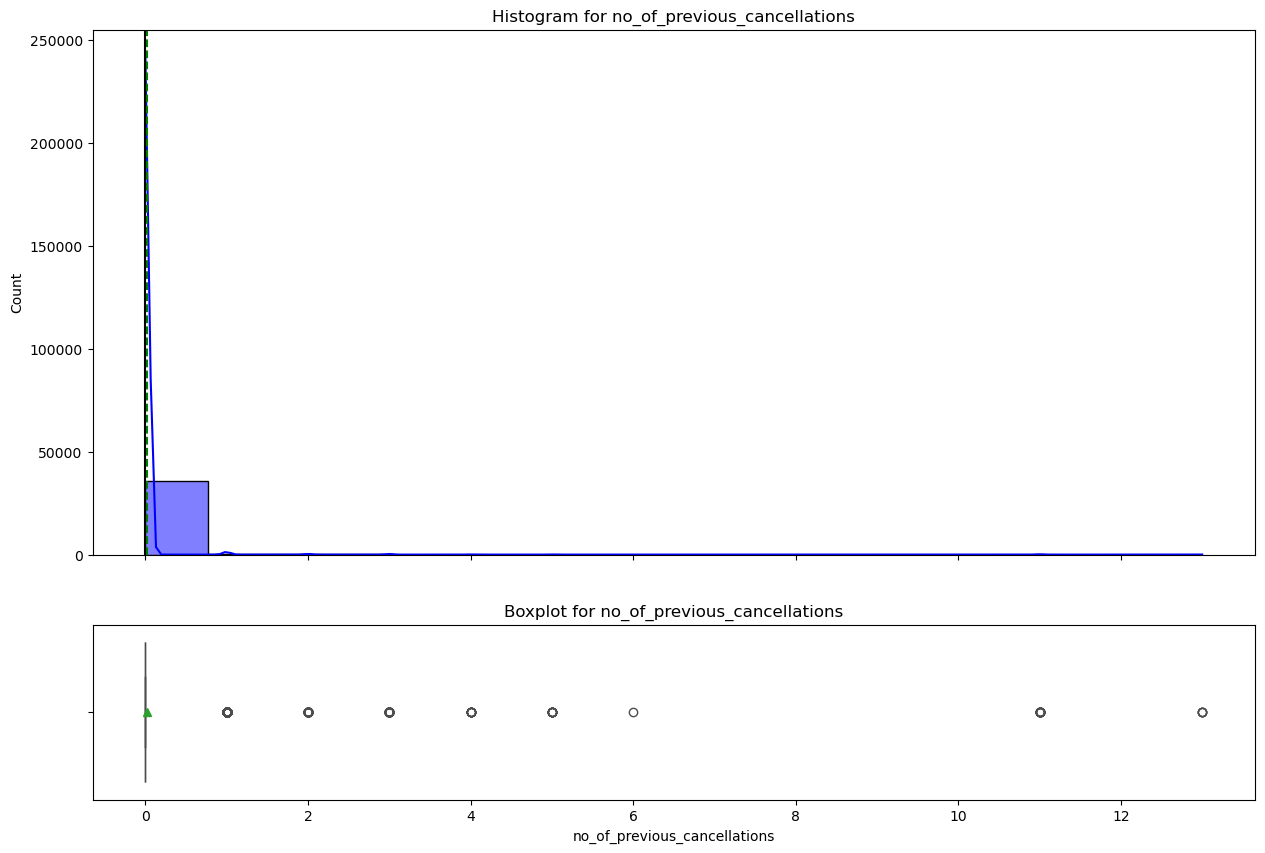

In [2748]:
univariate_analysis_for_numCols(hotel_df,'no_of_previous_cancellations', figsize=(15, 10),)

**Observation**

- *The `no_of_previous_cancellations` is `0` for most of the bookings with few outliers.*
- *The `maximum` number of previous booking cancelled by the customers prior to current booking is `13`.*
- *No box and whisker indicate 75% of booking is not cancelled prior(same value and no variation) to current booking i.e 0.*

**`no_of_previous_bookings_not_canceled`**

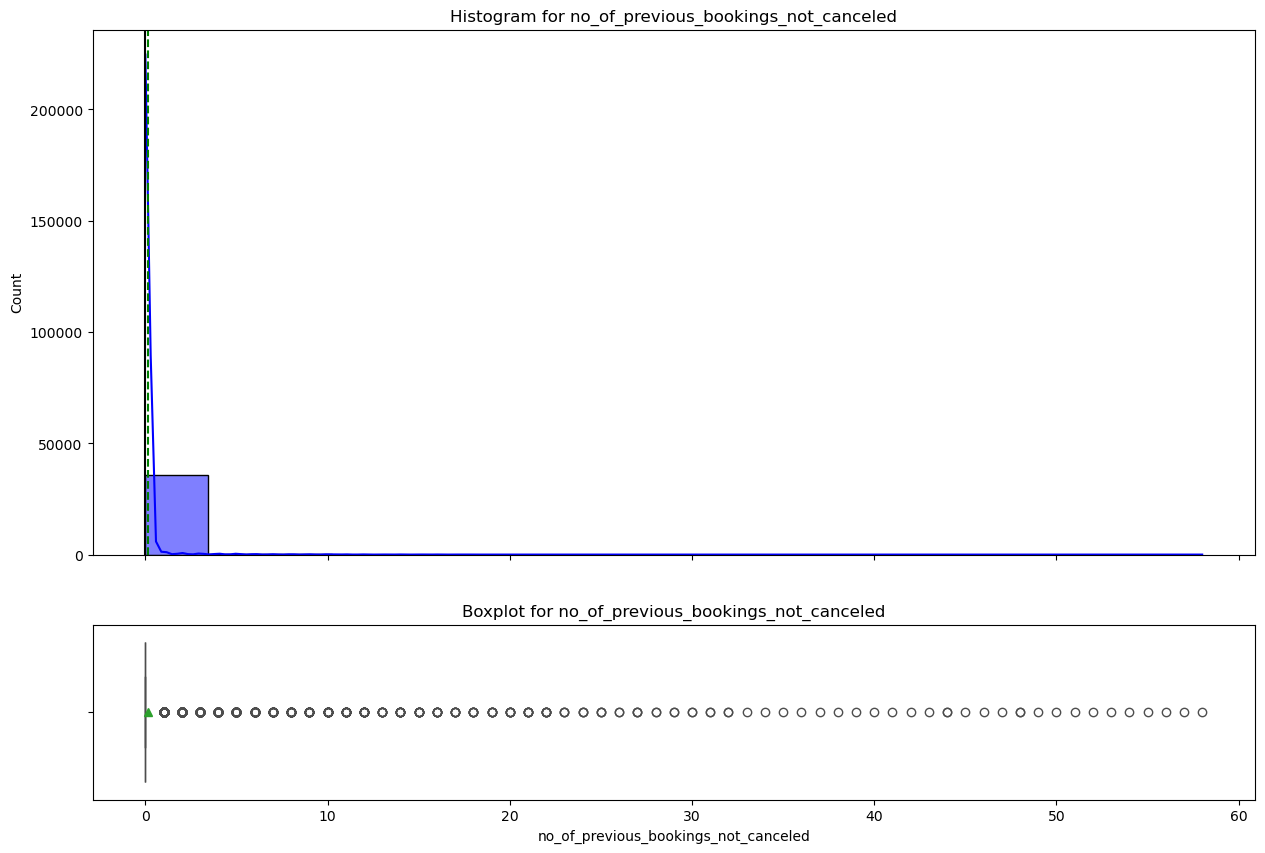

In [2751]:
univariate_analysis_for_numCols(hotel_df,'no_of_previous_bookings_not_canceled', figsize=(15, 10),)

**Observation**

- *The `maximum` number of previous booking not cancelled by the Customer is `58`,the higher previous booking rate  suggests corporate or business trips and returning customers*.
- *No box and whisker indicate 75% of booking is not cancelled prior(same value and no variation) to current booking*

**Function for plotting categorical column**

In [2754]:
#create a function to plot bar plot for categorical columns 
def univariate_analysis_for_catgCols(df,column_name, perc=False, n=None):

    """
    df: dataframe 
    column_name: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = df.shape[0]   #total number of rows
    count = df[column_name].nunique()  # number of unique values in the column    
    
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    #create bar plot
    plt.xticks(rotation=90, fontsize=15)    
    plt.title(f'Bar graph for {column_name}')
    plt.xlabel(f'{column_name}')
    ax = sns.countplot(data = df,x = column_name,  order = df[column_name].value_counts().index[:n], hue = column_name)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    
    plt.show()  # show the plot

**`no_of_adults`**

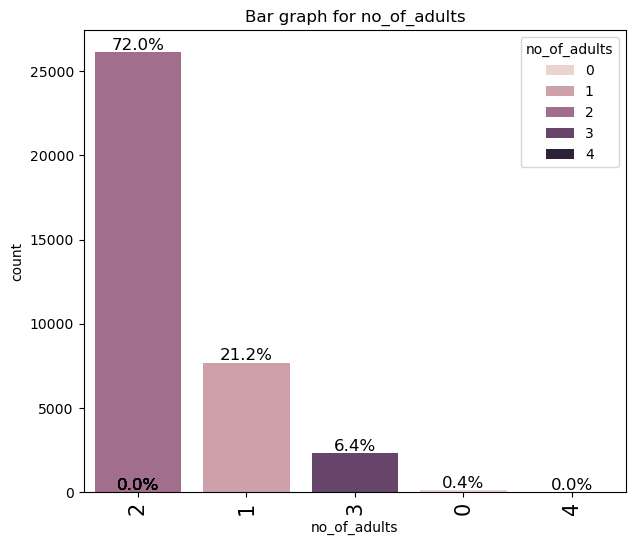

In [2756]:
univariate_analysis_for_catgCols(hotel_df,'no_of_adults', perc=True, n=None)

**Observation**

- *`72 percent` of booking are done for `2 adults`, followed by `1 adult(21 %)` and `3 adults(6.4 %)`, indicating small family or business trips.*
- *There are also `few booking done for 4 adults`, but there value is `insignificant`.*
- *Also there are indication of `few bookings without any adults involved`, which can be data discrepancy or booking done for minors/children with parental consents for group/school trips. More data information and further analysis are required to understand this*

**`no_of_children`**

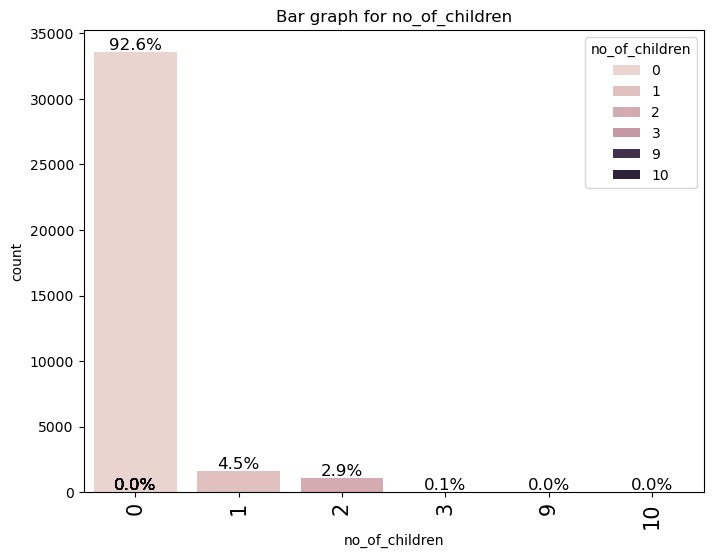

In [2759]:
univariate_analysis_for_catgCols(hotel_df,'no_of_children', perc=True, n=None)

**Observation**

- *`92 percent` of bookings are done `without any children`, indicating business or couples travelers.*
- *Around `7 percent` of bookings are done by customer `having children (1, 2 or 3)`, suggesting the Hotel cater more to business professional,couples or solo travelers.*
- *There are few bookings done for 9 and 10 children, which seems to be data discrepancy or can be a booking for group/school trips. but still Most of the hotels allows maximum of 4-5 people in a single room. Also more information is needed on type of rooms(suite are booked under this to get clear picture.*
- *Lets treat these outliers by changing the children numbers for 9 and 10 with 3.*

In [2761]:
# replacing 9, and 10 children with 3
hotel_df["no_of_children"] = hotel_df["no_of_children"].replace([9, 10], 3)

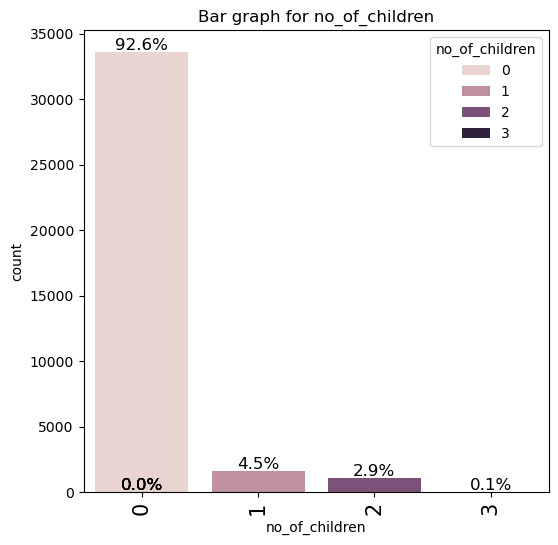

In [2762]:
#call the function to visualize the no_of_children after replacing
univariate_analysis_for_catgCols(hotel_df,'no_of_children', perc=True, n=None)

**`no_of_weekend_nights`**

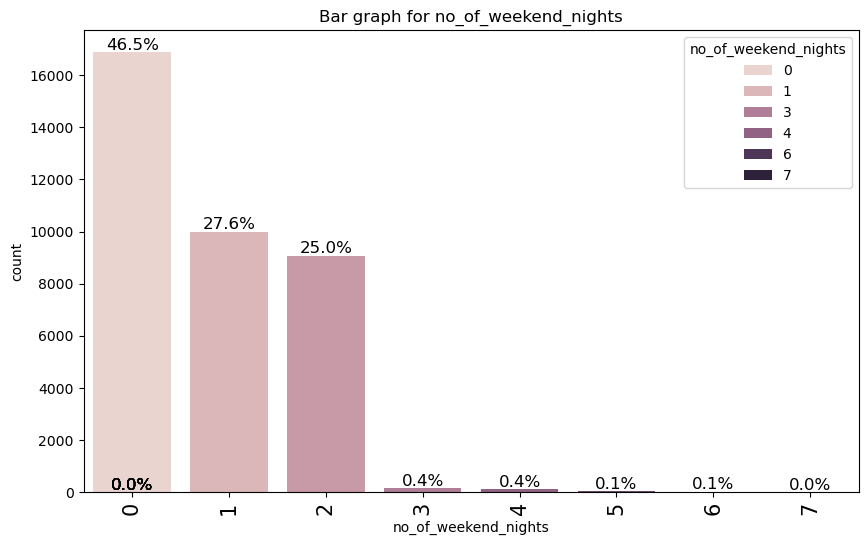

In [2764]:
#call the function to plot
univariate_analysis_for_catgCols(hotel_df,'no_of_weekend_nights', perc=True, n=None)

**Observation**

- *Around `47 percent` of booking are done with `no weekend stay`, suggesting corporate travelers.*
- *`25 % of bookings` include `both Saturday and Sunday` nights stay while apprx `28 percent` is done for `either for Saturday or Sunday`.*
- *There are `few booking` done where weekend nights stay are `5, 6 or 7`, indicating longer stay in hotel for business or vacation purpose*


**`no_of_week_nights`**

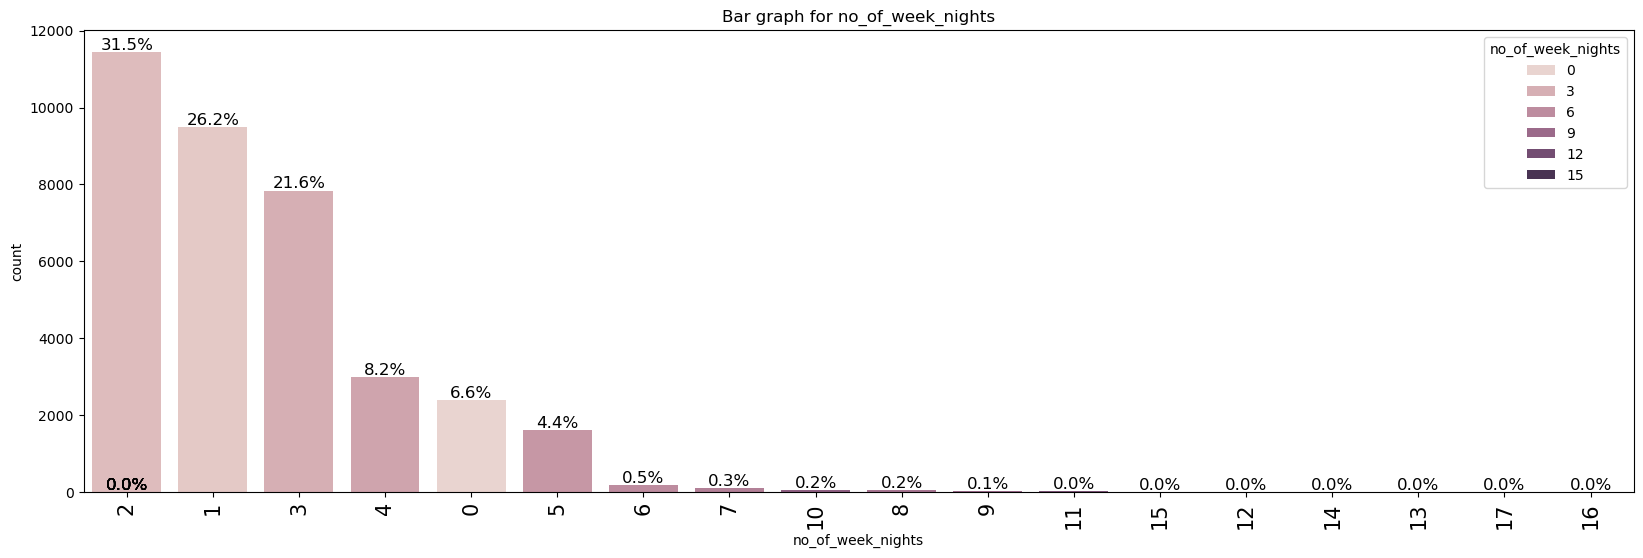

In [2767]:
univariate_analysis_for_catgCols(hotel_df,'no_of_week_nights', perc=True, n=None)

**Observation**
    
- *Around `32 percent` of booking are done for `2 nights` on weekday followed by `26 % for 1 day` and `22% for 3 days`.*
- *There are `few booking` done for `longer period(more than 10 days and upto 17)` indicating longer stay and returning customers for business trips.*
- *Few bookings are also done with `0 week nights`,indicating vacation plan for weekend stay.* 

**`required_car_parking_space`**

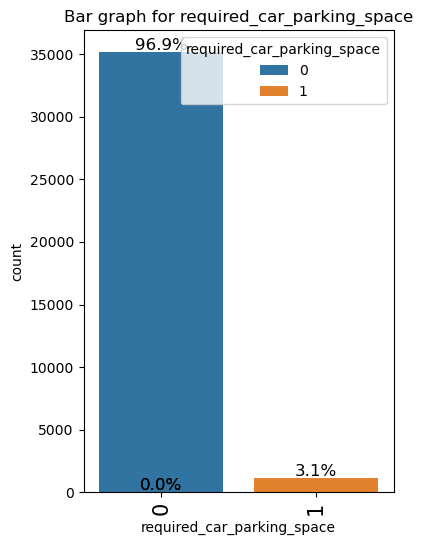

In [2770]:
univariate_analysis_for_catgCols(hotel_df,'required_car_parking_space', perc=True, n=None)

**Observation**
    
- *Around `97 percent` of booking are done `without request for car parking space`, suggesting public transportation are easily available and Hotel is located near to office building and attractions.*


**`repeated_guest`**

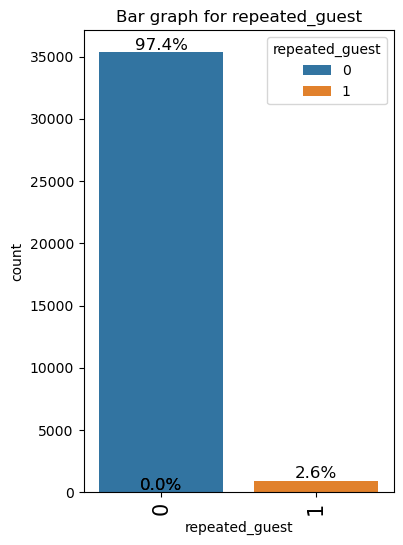

In [2773]:
univariate_analysis_for_catgCols(hotel_df,'repeated_guest', perc=True, n=None)

**Observation**
    
- *Only approx `3 percent` of booking are done by `repeated guest`. Most of the booking have been done by `new customers(97 %)`*


**`type_of_meal_plan`**

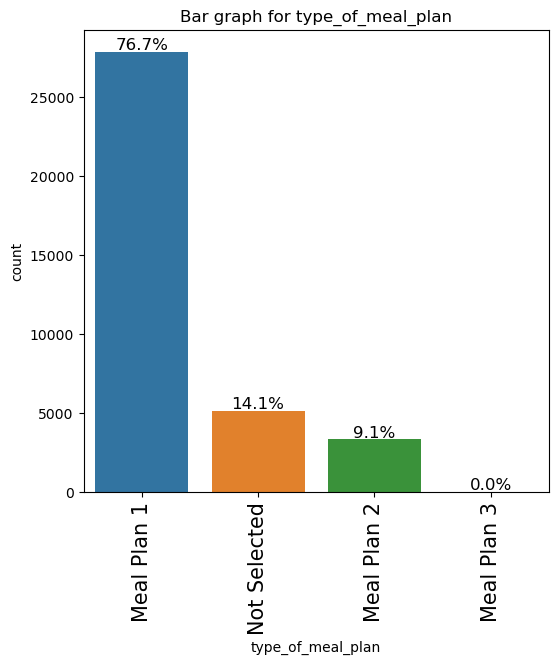

In [2776]:
univariate_analysis_for_catgCols(hotel_df,'type_of_meal_plan', perc=True, n=None)

**Observation**
    
- *The INN Hotel provides, `3 different meal-plans` (Meal plan 1, Meal Plan 2 and Meal Plan 3 ).The customers also an options to book a room without any meal plan (Not selected).*
- *`Meal plan 1( i.e Breakfast )` is the most selected one approx `(78%)` at the time of booking.*
- *Very `few booking `are done with `Meal plan 3(includes breaffast, lunch and dinner)`.*
- *`14 percent` of booking are done `without any meal plan`.*


**`room_type_reserved`**

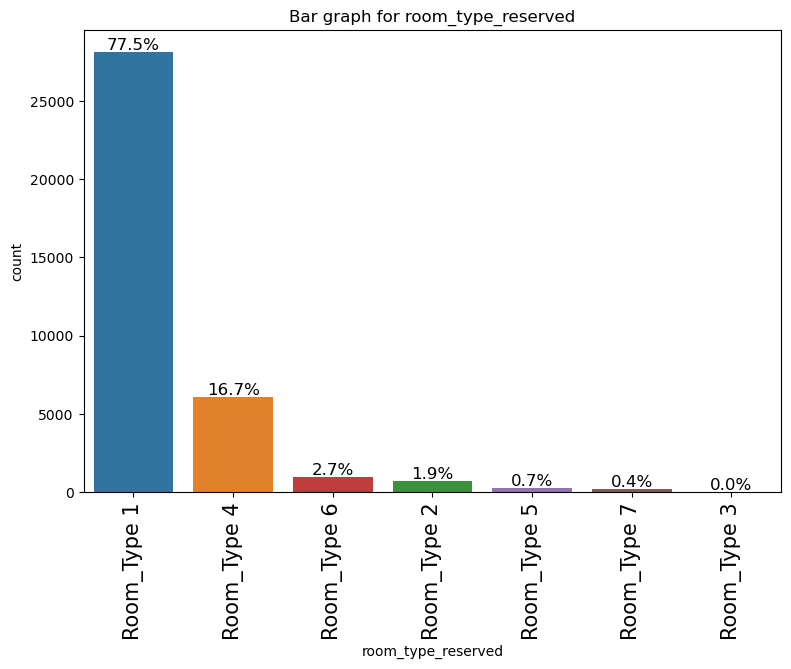

In [2779]:
univariate_analysis_for_catgCols(hotel_df,'room_type_reserved', perc=True, n=None)

**Observation**
    
- *The INN Hotel provides,`7 different types` of room `[Room_Type 1 to 7]` , looks like customer prefer `Room_Type 1 (78%)` followed by `Room_Type 4(approx 17 %)`, while booking the room, analyzing the room type with other columns will give more information of price and size of the room.*



**`market_segment_type`**

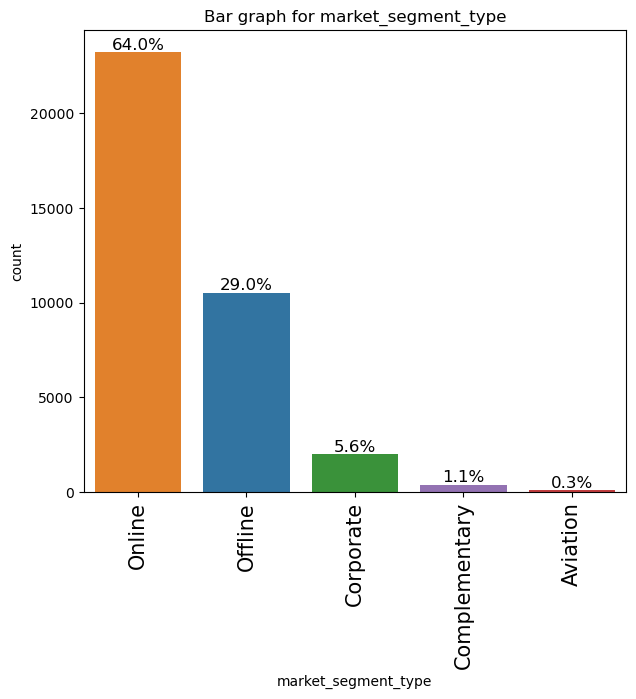

In [2782]:
univariate_analysis_for_catgCols(hotel_df,'market_segment_type', perc=True, n=None)

**Observation**
    
- *There are `5 `different market segment `Online,Offline,Corporate,Complementary and Aviation` and looks like most of the bookings are done through `online (64%) followed by offline(29%)`*.
- *Around `6 percent` of booking are done under `Corporate segment` indicating business center nearby.*  



**`arrival_month`**

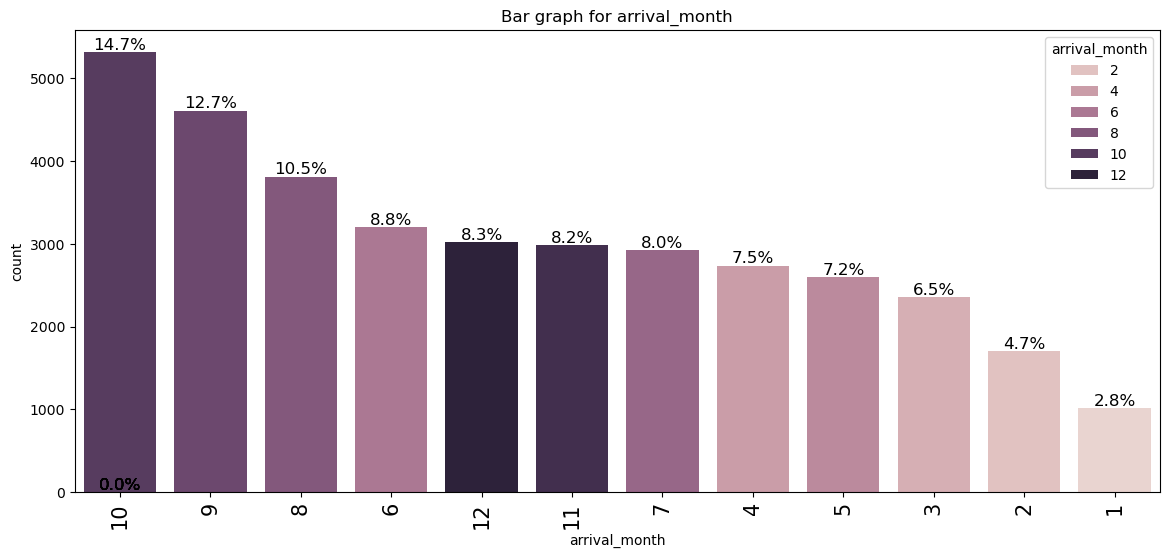

In [2785]:
univariate_analysis_for_catgCols(hotel_df,'arrival_month', perc=True, n=None)

**Observation**
    
- *Most of the booking are done in the `month of October(approx 15 %)` followed by `September ( ~13 %)` and `August(~11 %)`.*
- *`Booking are less` in the `beginning  of the year(Jan-may)` comprising around `29 %` of total booking.*
- *Booking `increase `little in the `month of June(8.8 percent) and later half of the year `indicating summer vacations and holidays and drops again little in the month of Nov and Dec*


**`booking_status`**

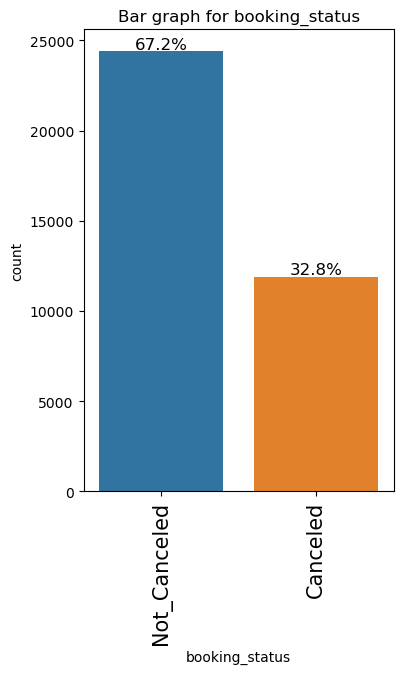

In [2788]:
univariate_analysis_for_catgCols(hotel_df,'booking_status', perc=True, n=None)

**Observation**
    
- *There are `2 unique` value for booking_status `Canceled and Not_Canceled`.Out of 36375 booking, `24390 bookings (i.e. 67%)` are `Not_Canceled`*


**Encoding Canceled bookings to 1 and Not_Canceled as 0 for further analysis(correlation with other varaibles)**

In [2791]:
#using map function to replace the booking status with 1 and 0 for canceled and not canceled status
hotel_df['booking_status']=hotel_df['booking_status'].map({'Canceled':1,'Not_Canceled':0})
#hotel_df['booking_status']

In [2792]:
hotel_df.info() #.map function will also change the datatype to int from object for booking status
hotel_df['booking_status']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

### Bivariate Analysis

#### Heat map to find correlation between numerical columns

In [2795]:
#select all the numerical columns and stored it in a list
cols_list=hotel_df.select_dtypes(include=np.number).columns.tolist()
data_corr=hotel_df[cols_list].corr()
#data_corr

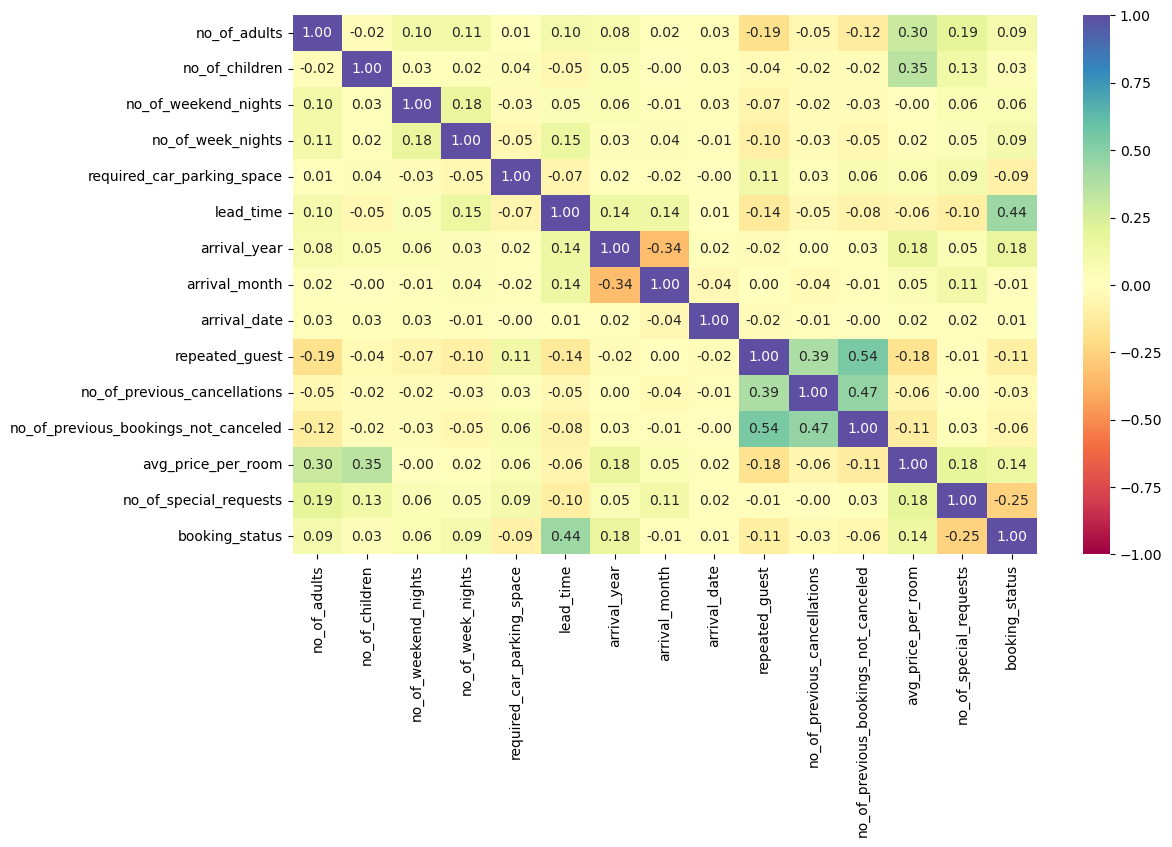

In [2796]:
#plot heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    data_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


**Observation**

- *`Booking status` is moderately positively correlated`(.44) to lead time`,i.e more the lead time more likely the booking will get cancel*
- *We do not see `very strong correlations between all variables`. most of the variables are `less or moderately correlated`*.
- *The `no of adults and children` show `moderate positive `correlation with `avg price per room`, which is true more the no. of people larger and bigger room is required*
- *`repeated guest` are `strongly correlated(0.54)` with number of `previous booking not canceled.`*
- *`booking status` is `negatively correlated` with no. of request. more the request less is chance of the cancelation*
- *no. of week nights and weekend nights are `slightly positive correlated`, i.e possibility of booking of weekends nights if they falls between weeknights(ex thur-sat).* 

**Creating common functions for Bivariate analysis.**

In [2799]:
def bivariate_analysis_wrtTarget(df,predictor,target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title(f'Histogram of {predictor} wrt {target}=' + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
    )

    axs[0, 1].set_title(f'Histogram of {predictor} wrt {target}= '+ str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
    )

    #boxplot with outliers
    axs[1, 0].set_title(f'Boxplot:{target} vs {predictor}')
    sns.boxplot(data=df,x=target, y=predictor, ax=axs[1,0],palette = 'Spectral', hue=target ,showmeans=True)
    axs[1, 0].legend(['Not Canceled (0)', 'Canceled (1)'],title='Booking Status')

    #boxplot without outliers
    axs[1, 1].set_title(f'Boxplot(without Outliers):{target} vs {predictor}')
    sns.boxplot(data=df,x=target, y=predictor, ax=axs[1,1],palette = 'Spectral', hue=target ,showmeans=True, showfliers=False)
    axs[1,1].legend(['Not Canceled (0)', 'Canceled (1)'],title='Booking Status')
    plt.tight_layout() 
    plt.show()

In [2800]:
#stacked barplot common fn wrt target
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique() #unique count of predictor
    sorter = df[target].value_counts().index[-1] #sort by booking status =1 (cancelled
    
    #create contigency table using pd.crosstab function
    #margins=True -> Adds row and column totals.
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(by=sorter, ascending=False )
    #print the contigency table count wise
    print(tab1)
    print('-' * 120)
    tab2 = pd.crosstab(df[predictor], df[target], normalize='index').sort_values( by=sorter, ascending=False)  #normalize='index' will give row-wise %)

    #print the contigency table percent wise  
    print('Percentwise:')
    print(tab2*100)
    print('-' * 120)


    #normalize='index'to plot the distribution percent wise i.e proportions 
    tab = pd.crosstab(df[predictor], df[target], normalize='index').sort_values(  by=sorter, ascending=False ) 
    
    #plot the stacked bar
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5),color=['green', 'Orange'])
    plt.legend(['Not Canceled (0)', 'Canceled (1)'],title='Booking Status',loc="center", bbox_to_anchor=(0.75, 1.15))
    plt.show()

**`Booking status vs lead time`**

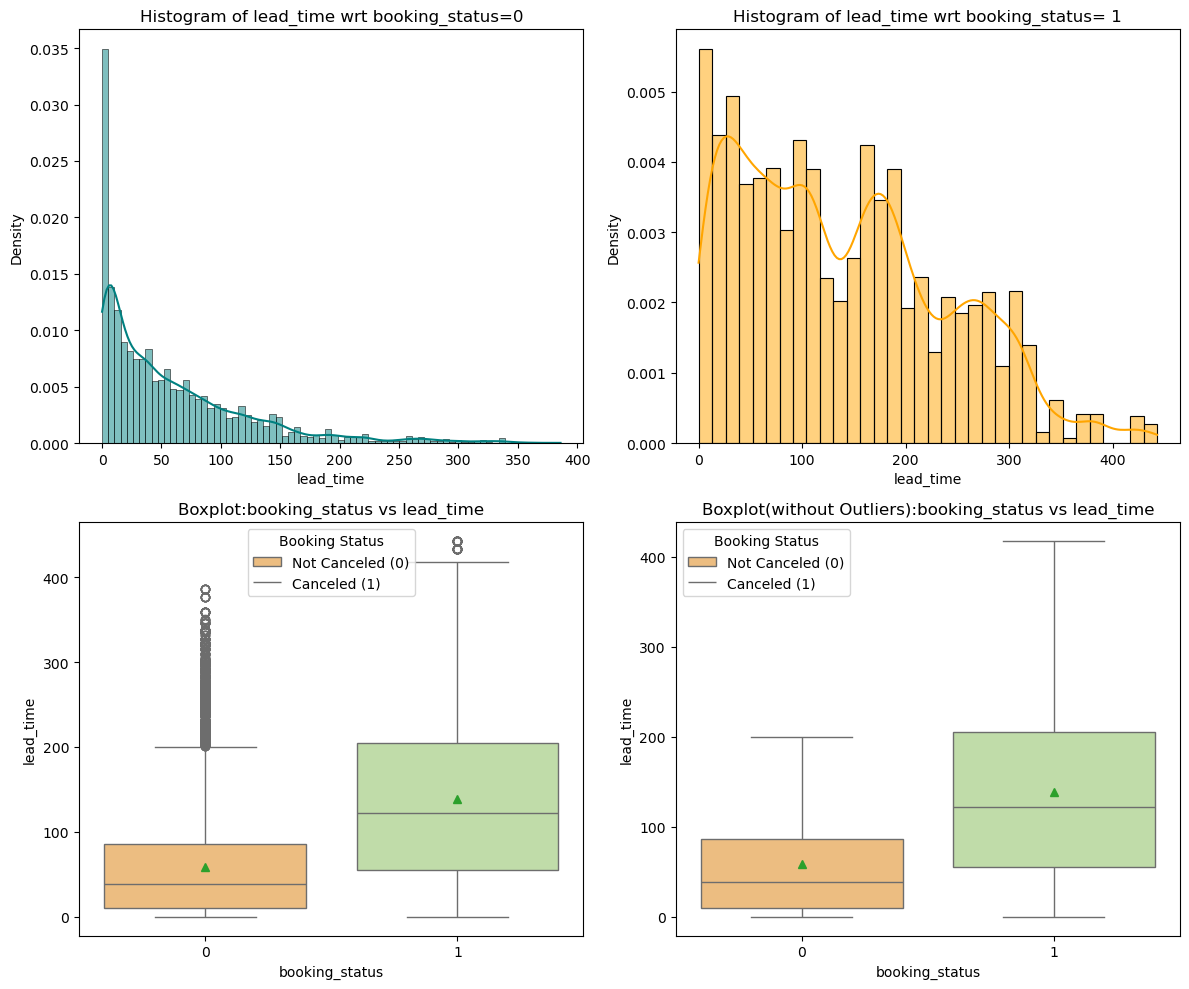

In [2802]:
bivariate_analysis_wrtTarget(hotel_df, 'lead_time', 'booking_status')

**Observation**

- *We can observe from above plot `Booking status` is strongly positively correlated to lead time,i.e `more the lead time` more likely the booking will get cancel and vice -versa*.
- *The `lead time` is less than `100 days` for 50 % of middle data`(IQR)` where the booking is `not cancelled`.*
- *Whereas the `lead time for middle 50%` lies `between 50 to 200 days` when the booking are `cancelled`.*
- *Booking dates closer to arrival date are less like likely to be cancelled.*

#### **Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

#### **Q1. What are the busiest months in the hotel?**

**`Booking status vs arrival_month`**

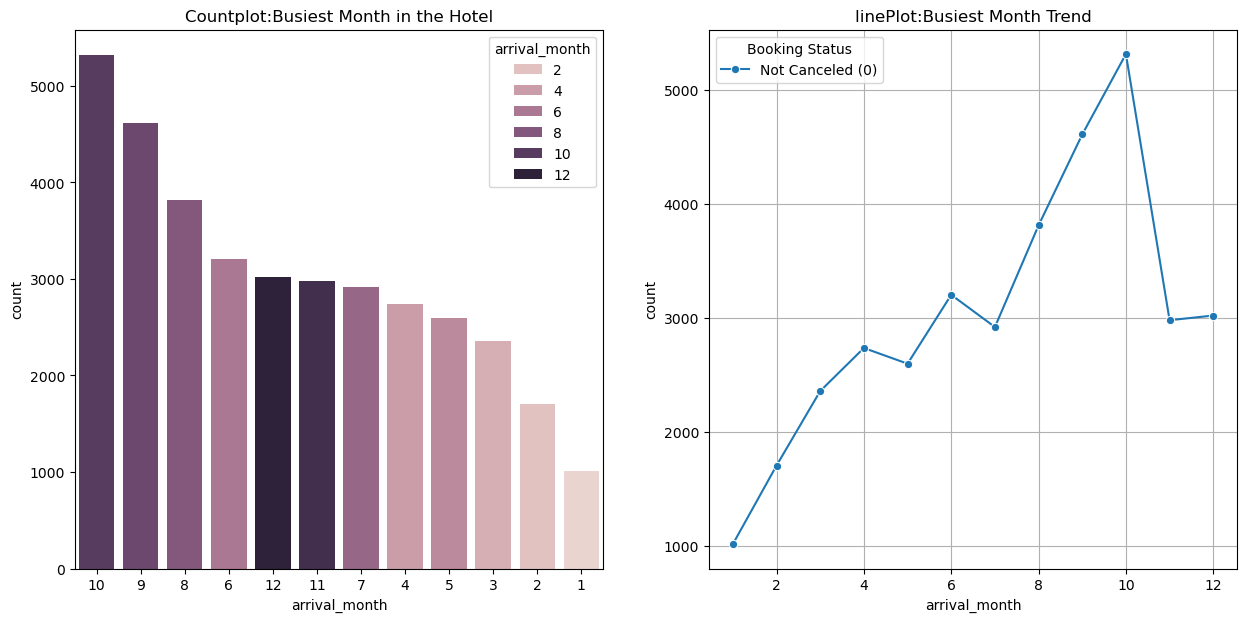

In [2807]:
#arrival month in descending order(busy to less busy month)
busy_month=hotel_df.arrival_month.value_counts().index 

#create a dataframe for arrival month count to see the trends 
busy_month_df=pd.DataFrame(hotel_df.arrival_month.value_counts()) 

#subplot (countplot and line plot) to see count and trends across all months
f1,axs=plt.subplots(1,2,figsize=(15, 7))  #subplot

#countplot
axs[0].set_title('Countplot:Busiest Month in the Hotel')
sns.countplot(data=hotel_df,x='arrival_month',ax=axs[0],order=busy_month, hue='arrival_month')

#lineplot
axs[1].set_title('linePlot:Busiest Month Trend')
sns.lineplot(data=busy_month_df,x='arrival_month',y='count',ax=axs[1] ,marker='o', ci=None)
axs[1].legend(['Not Canceled (0)', 'Canceled (1)'],title='Booking Status')
plt.grid()
plt.show();

**Observation**

- *Most of the booking are done in the `month of October(approx 15 %) highest` followed by `September ( ~13 %)` and `August(~11 %)`.*
- *`Booking are less` in the `beginning  of the year(Jan-may)` comprising around `29 %` of total booking.*



#### **Q2. Which market segment do most of the guests come from?**

**`booking_status wrt market_segment_type`**

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------
Percentwise:
booking_status              0        1
market_segment_type                   
Online               63.49186 36.50814
Offline              70.05129 29.94871
Aviation             70.40000 29.60000
Corporate            89.09271 10.90729
Complementary       100.00000  0.00000
------------------------------------------------------------------------------------------------------------------------


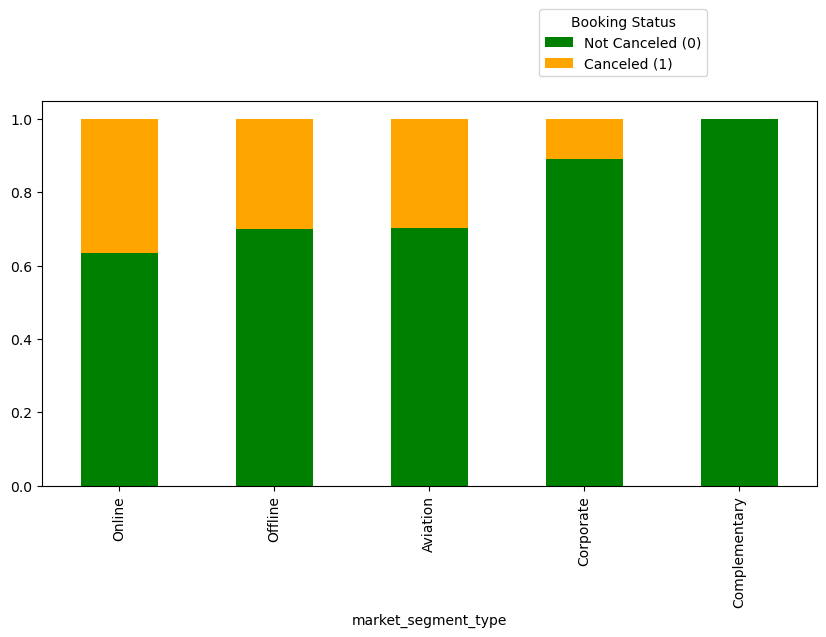

In [2811]:
#call the function for stacked plot
stacked_barplot(hotel_df, 'market_segment_type', 'booking_status')


In [2812]:
hotel_df['market_segment_type'].value_counts(1)

market_segment_type
Online          0.63994
Offline         0.29023
Corporate       0.05560
Complementary   0.01078
Aviation        0.00345
Name: proportion, dtype: float64

**Observation**

- *Most of the guests belong to `Online segment(23214 bookings i.e approx 64 %)` followed by `offline( 29%) and Corporate(~6 %)`.*
- *In terms of booking cancelled, `Online bookings(~37 %)` cancellation are `more` followed by `offline(~30 %) and Aviation(~ 29.6%)`.*
- *There are `no booking cancelled` for `Complementary` segment and only `~10 % for Corporate segment`.*

#### **Q3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

**`avg_price_per_room by market_segment_type`**

In [2816]:
#Calculate average price per market segment
price_by_mktseg=hotel_df.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False) #sort by descending average price 
price_by_mktseg

market_segment_type
Online          112.25685
Aviation        100.70400
Offline          91.59844
Corporate        82.91174
Complementary     3.14176
Name: avg_price_per_room, dtype: float64

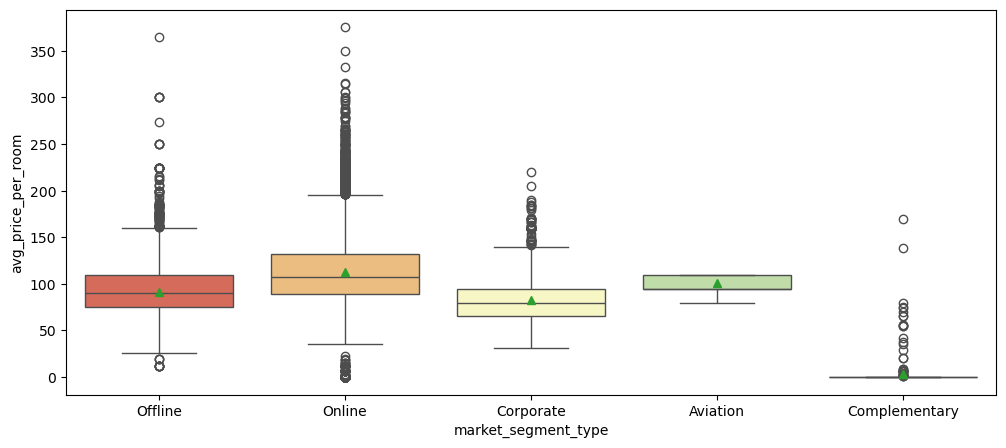

In [2817]:
#boxplot to show visualization
plt.figure(figsize=(12, 5))
sns.boxplot( data=hotel_df, x='market_segment_type', y='avg_price_per_room',palette = 'Spectral', hue='market_segment_type' ,showmeans=True )
plt.show()

**Observation**

- *On an `average room price` for `Online booking is highest(112.2 euros)`, followed by `Aviation (100.7 euros)` and `Offline (91.59 euros)`.*
- *`Complementary segment`has the `lowest` average price per room`(3.14 euros).`*
- *Except for `Aviation segment`, there are lots of ` outliers present at higher end `indicating dynamic pricing due to high demands of rooms in peak season.*
- *Few room prices at very lower rate indicate, hotel offering rooms at lower price due to off season/high cancelation/promotional offer to mitigate their losses and boost revenue.* 

#### **Q4. What percentage of bookings are canceled?**

In [2820]:
#Calculate total booking done 
total_booking=hotel_df['booking_status'].shape[0]  #count of all booking id

#total number of booking which got canceled 
booking_cancel=hotel_df['booking_status']==1
booking_cancel_count=hotel_df[booking_cancel]['booking_status'].count()   #get the count

#percentage of booking canceled
booking_can_per=round((booking_cancel_count/total_booking),2)*100

#print the result
print('total_booking done count:',total_booking)
print('total number of booking which got canceled:',booking_cancel_count)
print('overall booking canceled Percentage:', booking_can_per,'%')

total_booking done count: 36275
total number of booking which got canceled: 11885
overall booking canceled Percentage: 33.0 %


**let analyze booking canceled in each month**

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------
Percentwise:
booking_status        0        1
arrival_month                   
7              55.00000 45.00000
6              59.69404 40.30596
8              60.97561 39.02439
5              63.51039 36.48961
4              63.63304 36.36696
10             64.64172 35.35828
9              66.64498 33.35502
3              70.31383 29.68

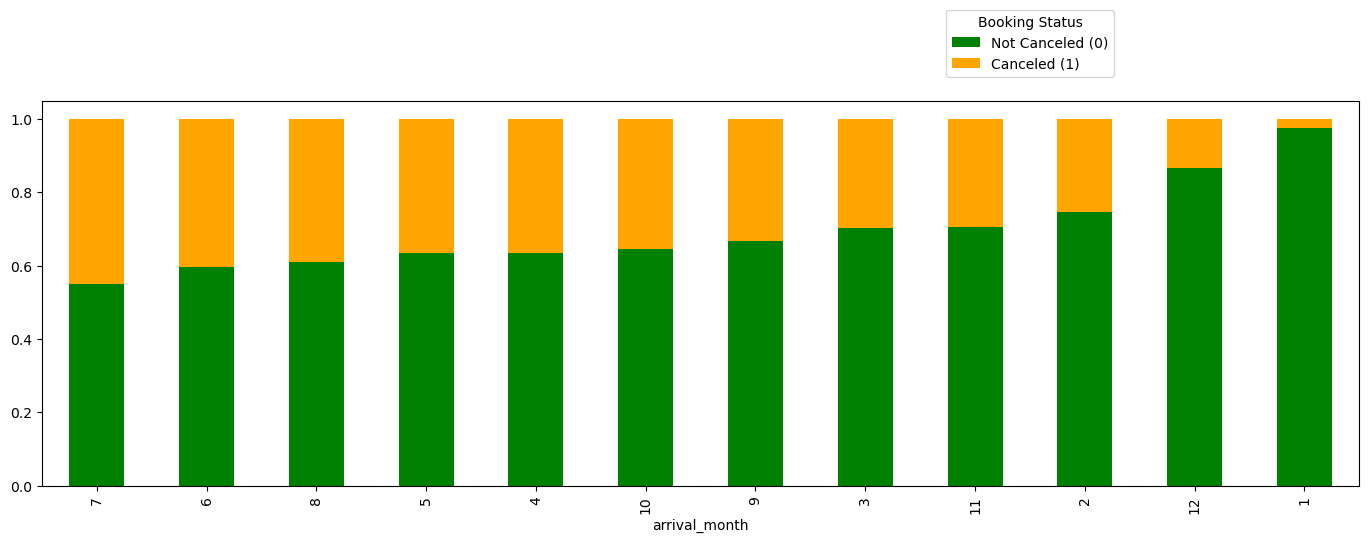

In [2822]:
stacked_barplot(hotel_df, 'arrival_month', 'booking_status')

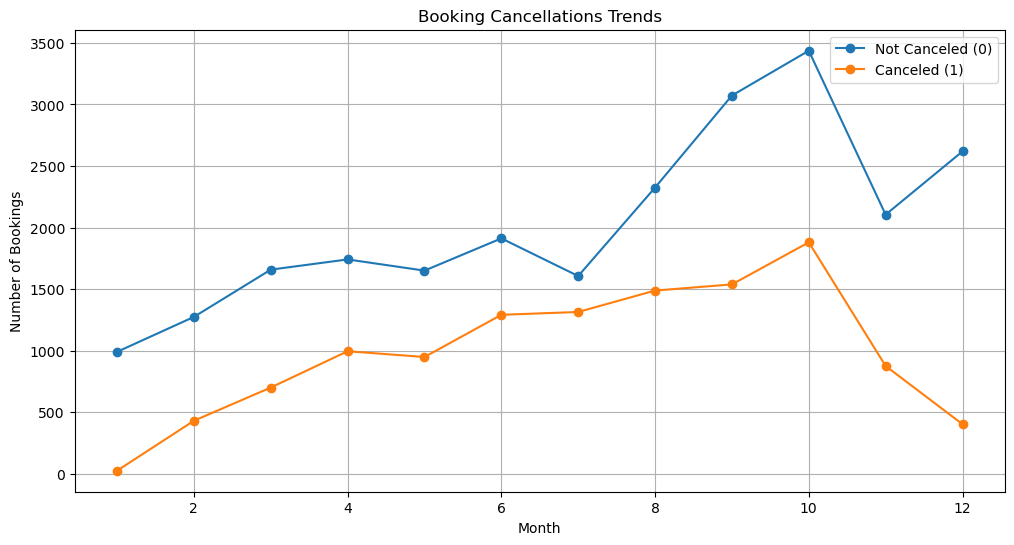

In [2823]:
#line plot to see the cancellation trend
df_booking_trend = hotel_df.groupby(['arrival_month', 'booking_status']).size().unstack(fill_value=0) #fill_value=0 [for missing combination is replaced with 0 instead of NaN].
df_trend.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Booking Cancellations Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled (0)', 'Canceled (1)'])
plt.grid()
plt.show()

**Observation**

- *We can observe that `cancelation` start rising february onwards and is `more during middle of the year (June-Oct)` and again `starts to fall october onwards`( i.e. towards the year ends)*.
- *`45% `of booking got `canceled` in the `month of July(highest)`, followed by `June (40%) and August (39 %)`. May and April has similar trend `~37 percent.`*
- *`Cancelation is very less` for the month of `January(~ 2 %) and Decemeber (~ 13%) `with respect to booking. February also have less cancelation rate (~23%).*
- *For the month of march the booking is less and cancelation is more.*

#### **Q5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status      0      1    All
repeated_guest                     
All             24390  11885  36275
0               23476  11869  35345
1                 914     16    930
------------------------------------------------------------------------------------------------------------------------
Percentwise:
booking_status        0        1
repeated_guest                  
0              66.41958 33.58042
1              98.27957  1.72043
------------------------------------------------------------------------------------------------------------------------


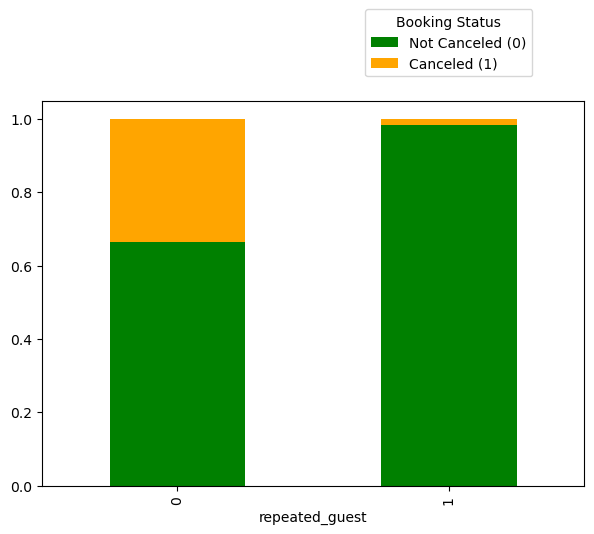

In [2826]:
stacked_barplot(hotel_df, 'repeated_guest', 'booking_status')

**Observation**

- *`Number of cancellation` made by `repeated customers` are `very less` when compared to `new customers`, suggesting loyal customers and likes the hotel services provided during their stay*.
- *There are `930 repeated guests` and  16 bookings i.e. `1.72 % ` are `canceled by repeated guest`'.*



#### **Q6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------
Percentwise:
booking_status                 0        1
no_of_special_requests                   
0                       56.79324 43.20676
1                       76.23318 23.76682
2                       85.40330 14.59670
3                      100.00000  0.00000
4                      100.00000  0.00000
5                      100.00000  0.00000
------------------------------------------------------------------------------------------------------------------------


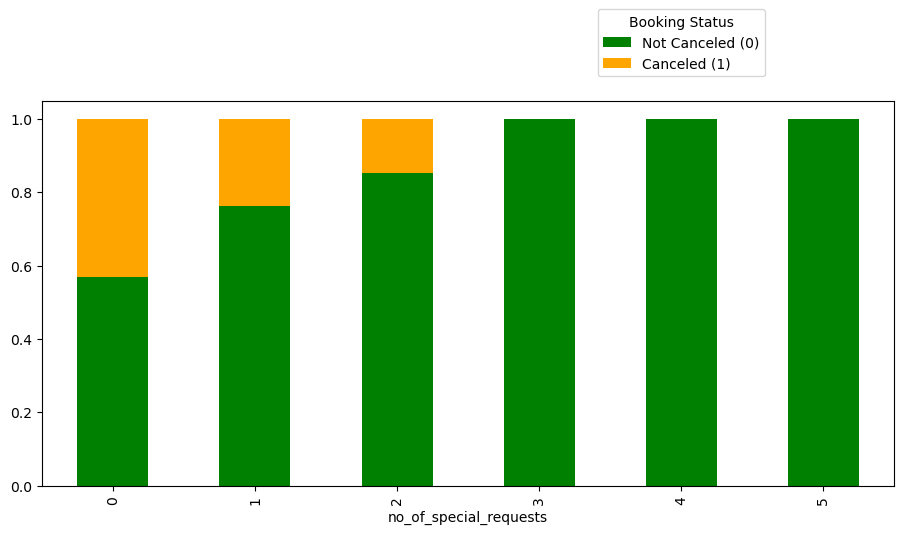

In [2829]:
stacked_barplot(hotel_df, 'no_of_special_requests', 'booking_status')

**Observation**

- *Customer who made `more special request` have `not canceled the bookings`.*

- *`Customers with no request` had `cancel 45% of total booking`made by them, followed by with special request 1 and 2.*
- *`Customers with 3 or more special requests` have `not canceled` the booking.*

**`avg_price_per_room wrt no_of_special_requests`**

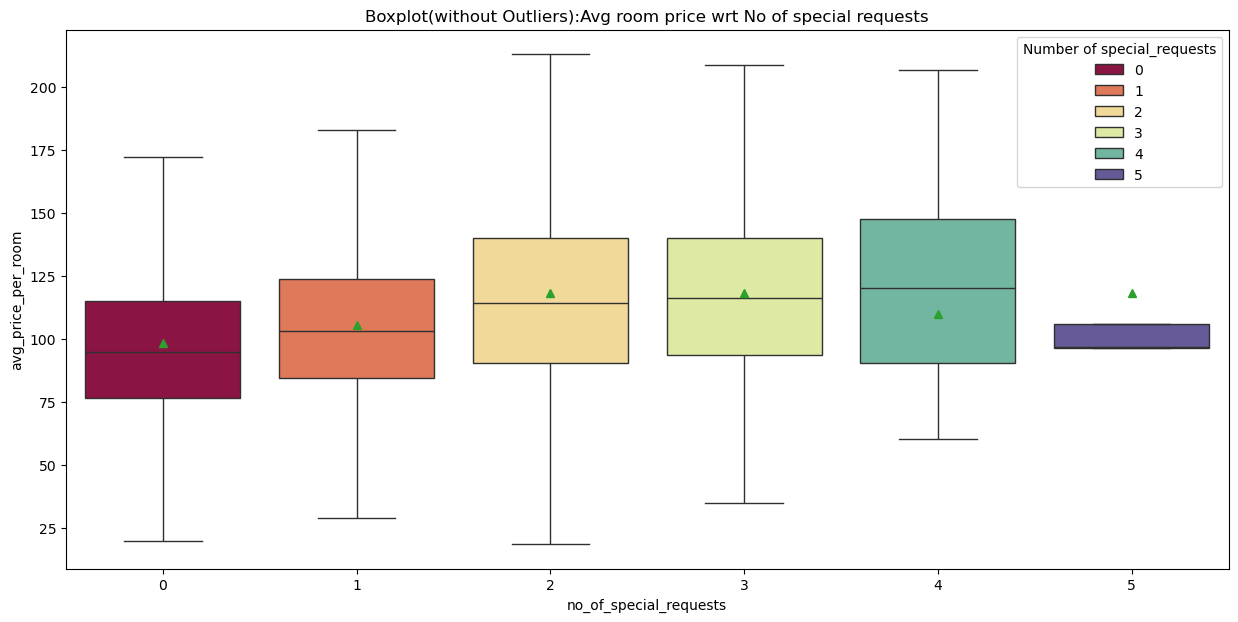

In [2832]:
#boxplot to show visualization
plt.figure(figsize=(15, 7))
plt.title('Boxplot(without Outliers):Avg room price wrt No of special requests')
sns.boxplot( data=hotel_df, x='no_of_special_requests', y='avg_price_per_room',palette = 'Spectral', hue='no_of_special_requests' 
            ,showmeans=True ,showfliers=False)
plt.legend(title='Number of special_requests',loc='upper right')
plt.show()

**Observation:**

- *`Average price` of room is `higher than median value` when number of `special request made is 5`, suggesting bigger room with better view and additional chargeable services and `presence of outliers` at higher end.*
- *`Mean and median price` are almost `similar` when the `request` is between `1-3` range.*
- *The `typical average room price` ranges from `75 to 140 euros (IQR)` for all type of request.*
- *Average price per room increases with `increase` in number of` requests` but not much.*
- *Price variations (spread out more IQR) is more when the number of request increases except for request=5.* 

**`booking_status wrt average price per room`**

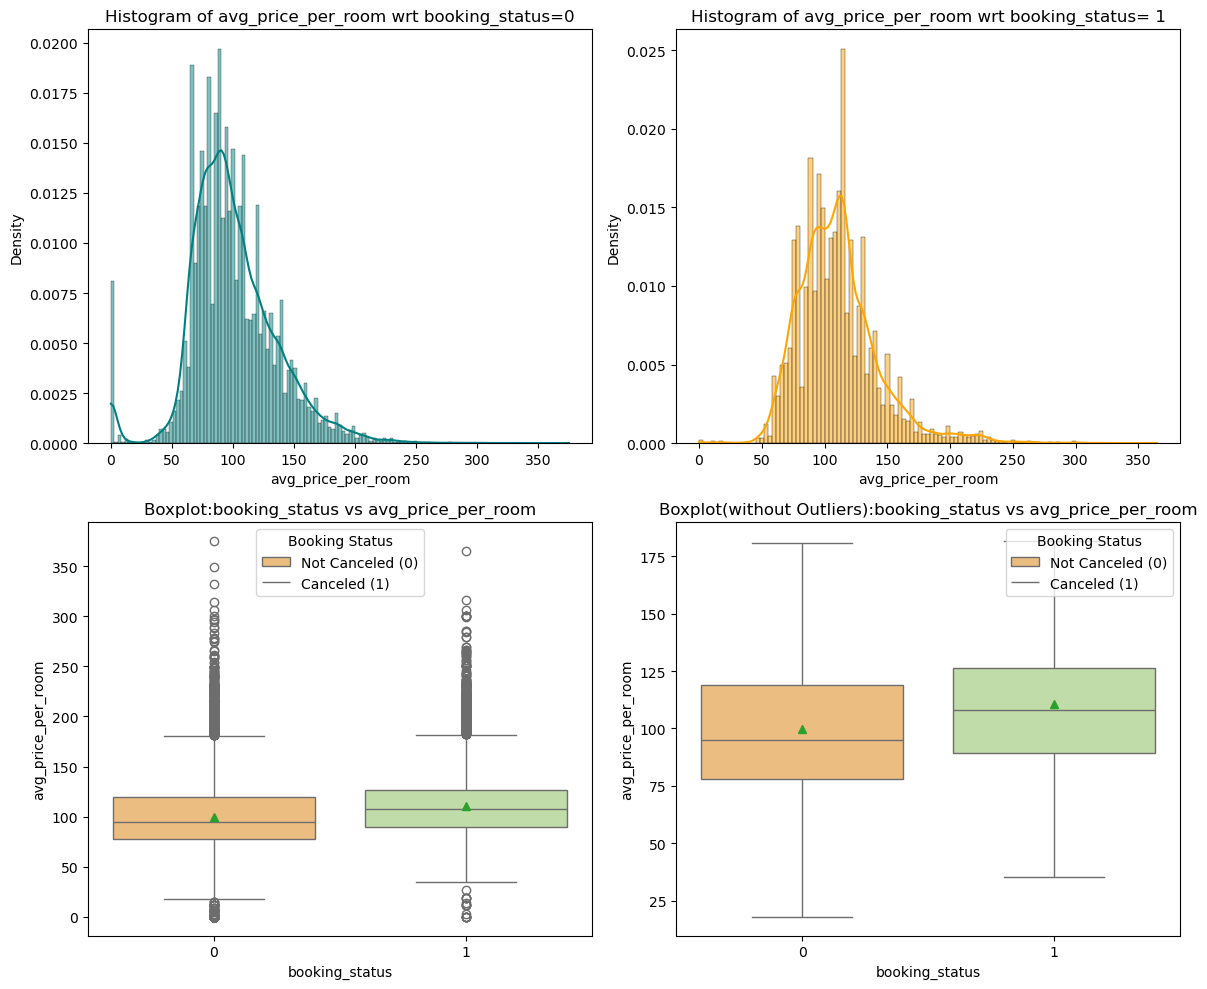

In [2835]:
bivariate_analysis_wrtTarget(hotel_df, 'avg_price_per_room', 'booking_status')

**observation**
- *The `average and median` price per room is `almost similar` for booking `with and without cancellations`.*
- *The `prices(in IQR range)` per room are `slightly lower` for the bookings which are not canceled `when compared with booking with cancellation`.i.e lower price room are less canceled.*

**`booking status wrt to adults and children`**

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [2839]:
#create a new dataframe of the customers who traveled with their families  
family_data = hotel_df[(hotel_df["no_of_children"] >= 0) & (hotel_df["no_of_adults"] > 1)] #cond to include adults > 1 and children >= 0
family_data.shape


(28441, 19)

In [2840]:
family_data["no_of_family_members"] = (family_data["no_of_adults"] + family_data["no_of_children"] )
#family_data.head()

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------
Percentwise:
booking_status              0        1
no_of_family_members                  
4                    56.35965 43.64035
3                    63.93356 36.06644
5                    64.70588 35.29412
2                    65.37375 34.62625
------------------------------------------------------------------------------------------------------------------------


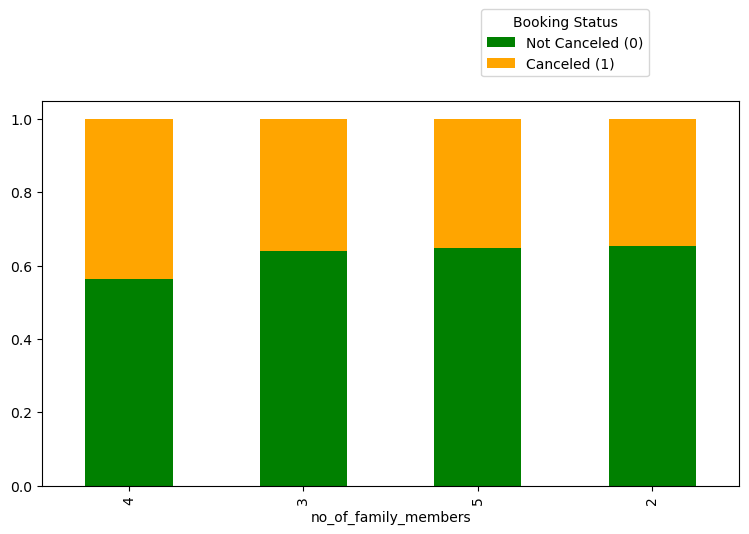

In [2841]:
#call the fn for plot
stacked_barplot(family_data,'no_of_family_members','booking_status') 

**Observation**

- *`Cancellation is more` when `family members are more` i.e adult travelling with more number of kids, compared to couples.*
- *The `count is less` for customers travelling with `more kids` , suggesting `less preferable by large families`.*

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [2844]:
#create dataframe for the customer who stay for atleast a day at the hotel
stay_df = hotel_df[(hotel_df["no_of_week_nights"] > 0) & (hotel_df["no_of_weekend_nights"] > 0)]
stay_df.shape

(17094, 19)

In [2845]:
stay_df["total_days"] = (
    stay_df["no_of_week_nights"] + stay_df["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

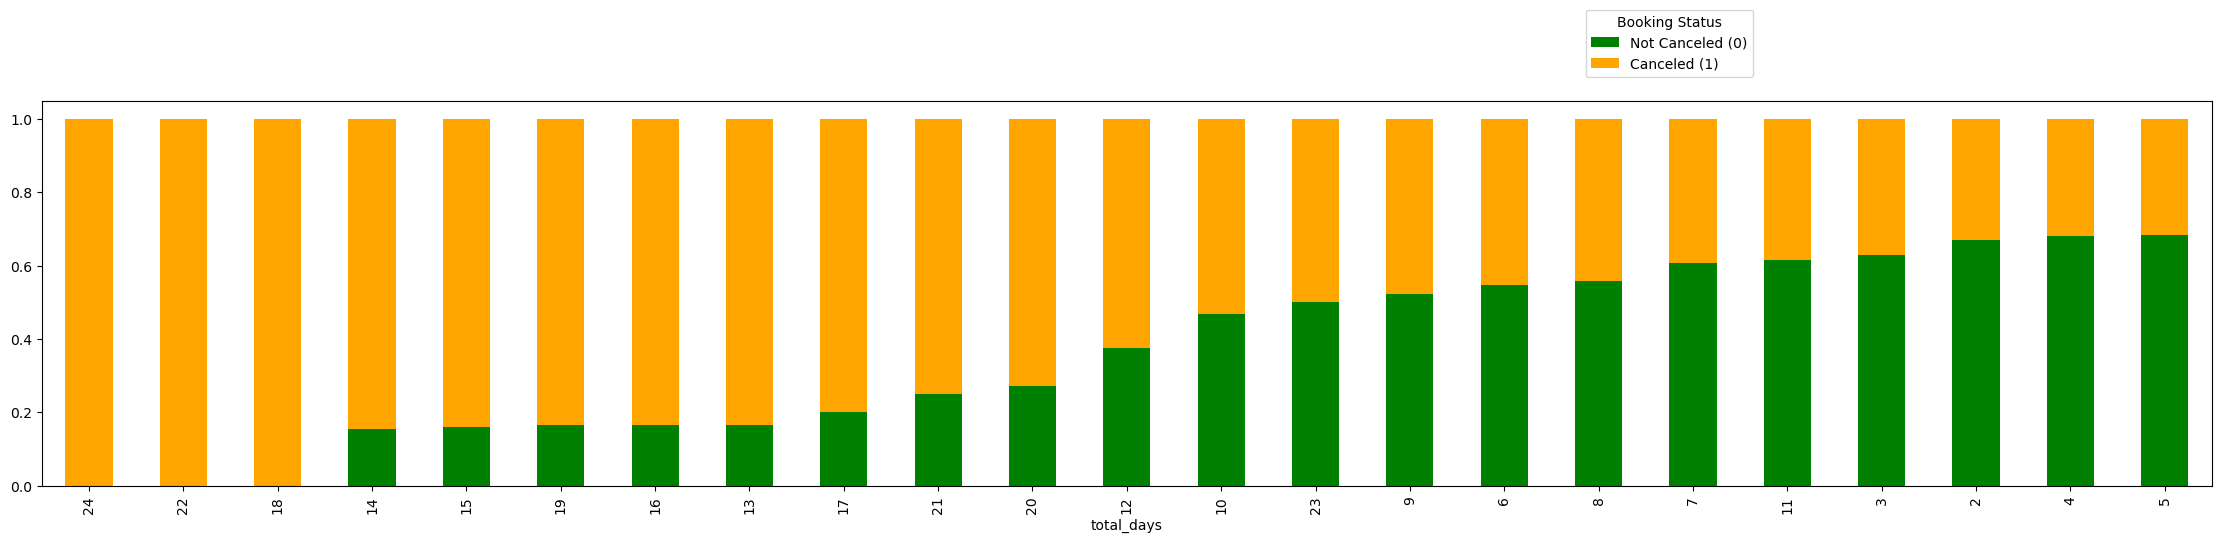

In [2846]:
#call the fn for plot
stacked_barplot(stay_df,'total_days','booking_status') 

**Observation**

- *Most of the `bookings are canceled` when the `stay `is booked for `longer periods( more than a week)`.*
- *`Cancelletion rates are less` for` shorter stay (3-5 days)`.* 

**`booking_status wrt required_car_parking_space`**

booking_status                  0      1    All
required_car_parking_space                     
All                         24390  11885  36275
0                           23380  11771  35151
1                            1010    114   1124
------------------------------------------------------------------------------------------------------------------------
Percentwise:
booking_status                    0        1
required_car_parking_space                  
0                          66.51304 33.48696
1                          89.85765 10.14235
------------------------------------------------------------------------------------------------------------------------


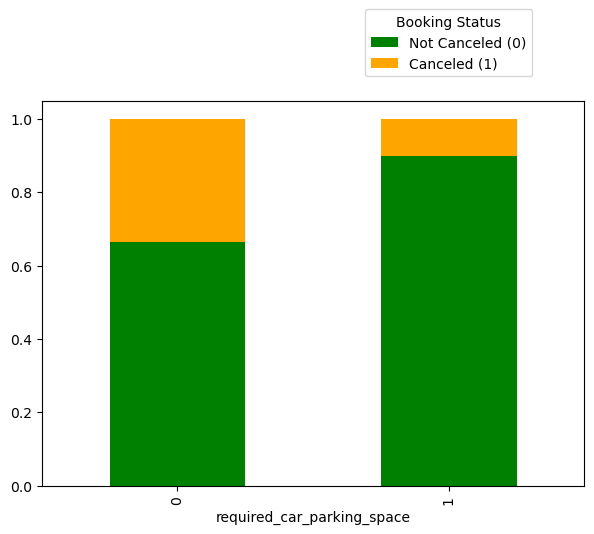

In [2849]:
stacked_barplot(hotel_df, 'required_car_parking_space', 'booking_status')

**Observation**

- *Cancelletion is less when booking is done with request for car space.*

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [2852]:
#Checking for null values
hotel_df.info()
hotel_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- *As noted earlier, `no missing values are present` in the given dataset.*

**Outliers Treatment**

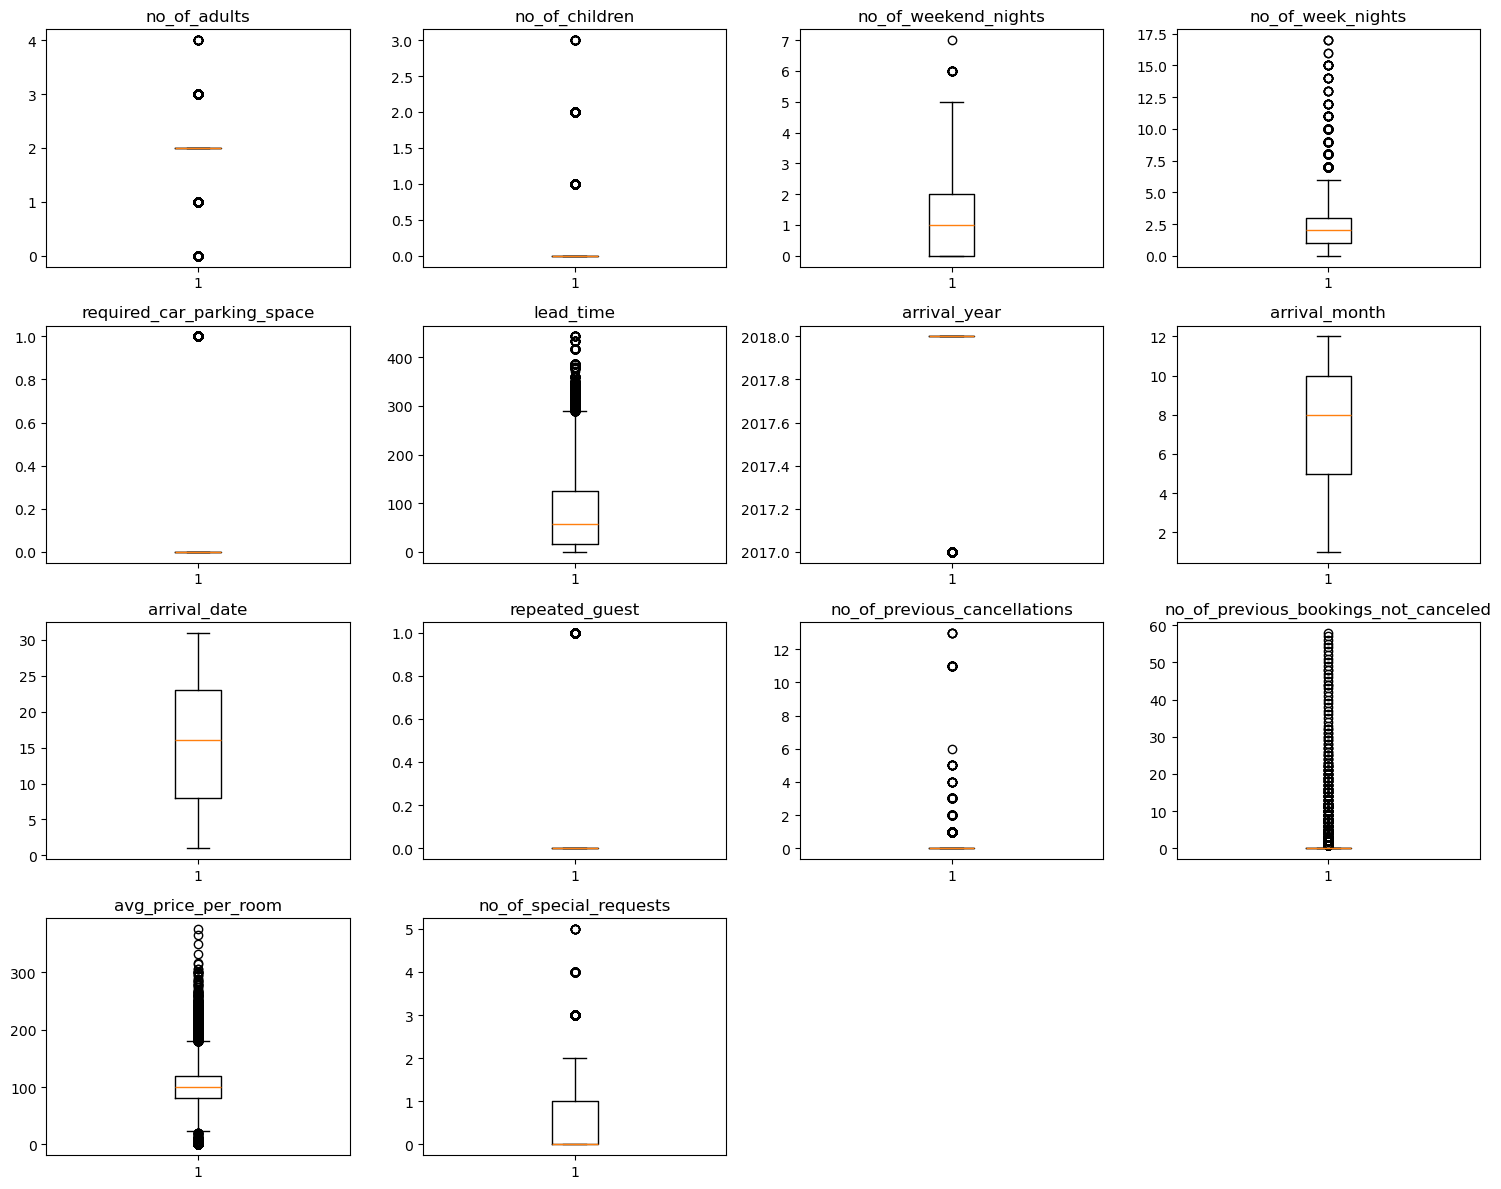

In [2855]:
# outlier detection using boxplot
numeric_columns = hotel_df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(hotel_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- *There are `quite a few outliers present` for most of the columns in the given dataset.*
- *However, we will not treat them as they are proper values.*

## EDA

- *It is a good idea to explore the data once again after manipulating it.*


In [2858]:
#check for missing data and datatype information
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

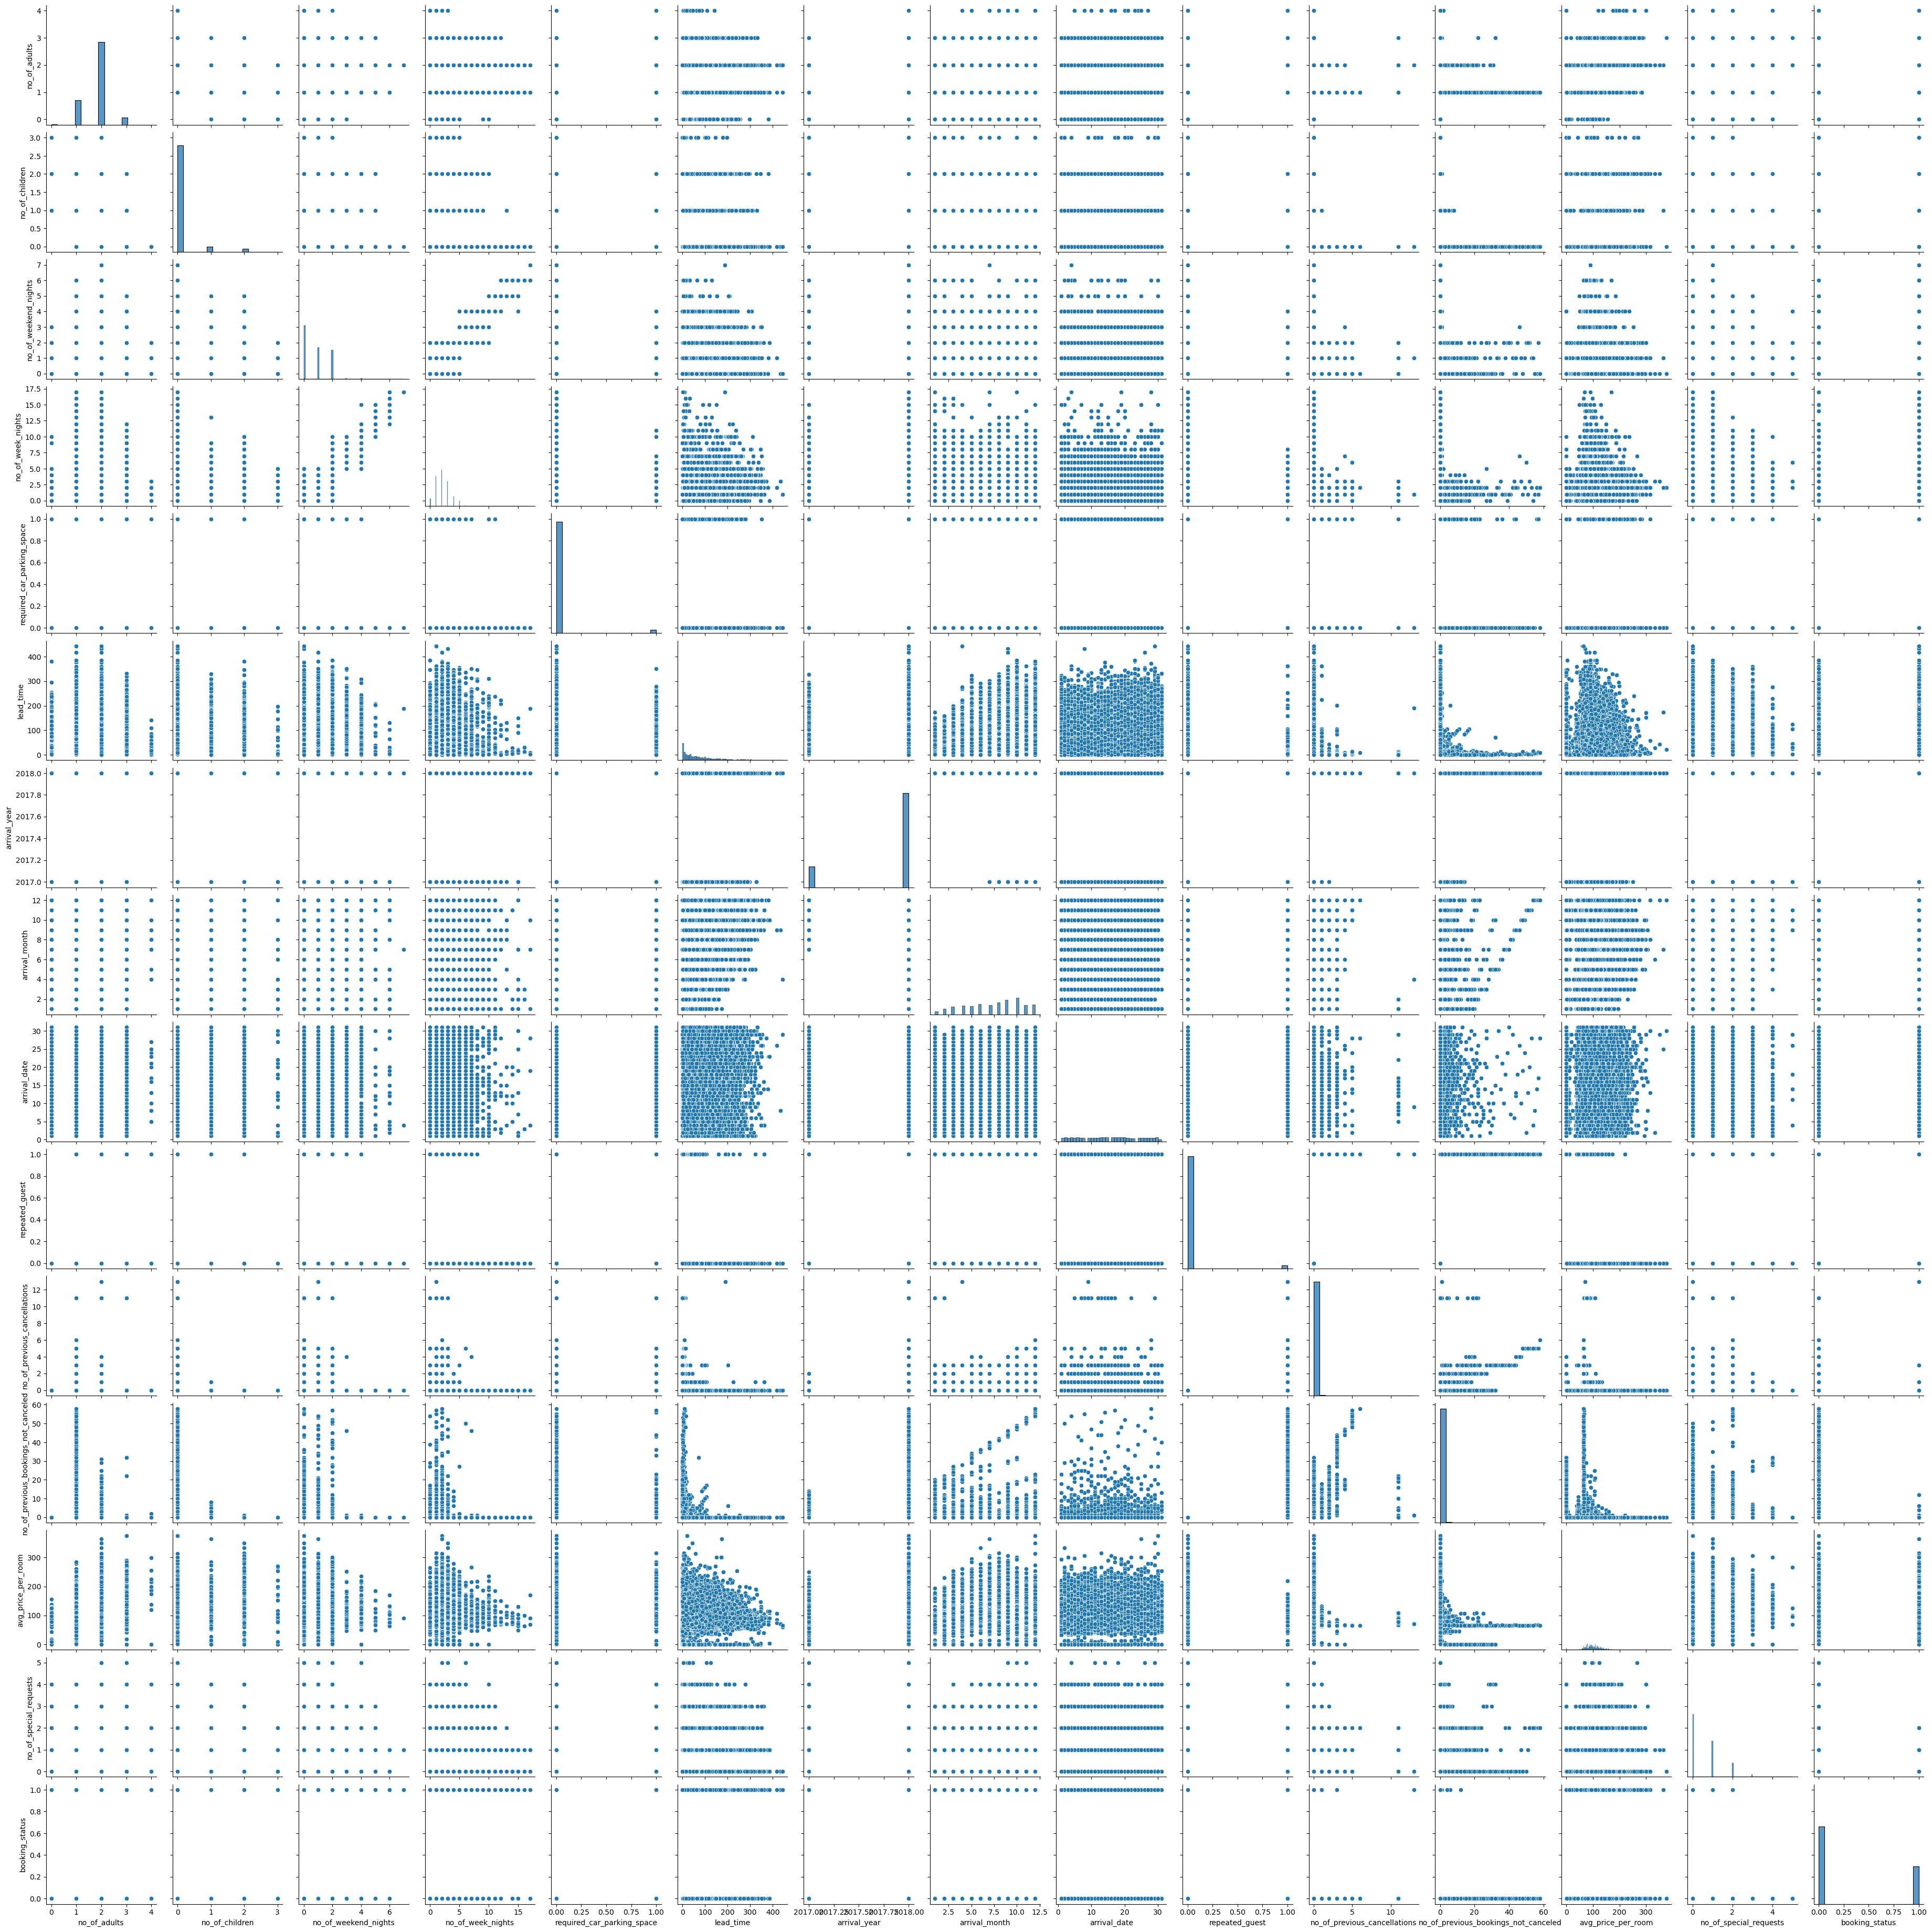

In [2859]:
# Lets plot pairplot to understand the relationships between the all the numeric variables
sns.pairplot(data = hotel_df);

- *Data seems to be ok after manipulations. lets now prepare data for Modeling.*

### Data Preparation for Modeling

- *The main objective of building a model is to `predict which bookings will be canceled` and identify factors that significantly influence it.*
- *There are few checks we need to perform before proceeding with model building.*  
- *`dropping the irrelevant columns` and `creating dummy variables` for categorical columns.*
- *Identify the `dependent and independent` variables.*
- *`splitting the dataset into train and test` to be able to evaluate the model that we build on the train data.*
 

#### **Step 1:** Making copy before dropping the attributes which are not necessary for model building.

In [2864]:
#Create a copy
df_new=hotel_df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

#### **Step 2:**  Dropping the irrelevant columns 

In [2866]:
#drooping booking id , arrival year (as it's a same year data) and we will be using months to analysis) from dataframe.
h_data=df_new.drop(['Booking_ID','arrival_year'],axis=1)
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

- *`Booking_ID, arrival_year` columns are dropped as they are not important for model building*

#### **Step 3:** Identify the dependent(Target) and independent(Predictors) variables

In [2869]:
#independent(predictors) variable
X=h_data.drop(['booking_status'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [2870]:
# adding constant
X = sm.add_constant(X) ## Complete the code to add constant to X


In [2871]:
#dependent(target) variable
y = h_data['booking_status']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36275 entries, 0 to 36274
Series name: booking_status
Non-Null Count  Dtype
--------------  -----
36275 non-null  int64
dtypes: int64(1)
memory usage: 283.5 KB


#### **Step 4**: Create dummy variables

In [2873]:
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

**Observation:**

- *`Dummy variable` is created for all the categorical columns `type_of_meal_plan, room_type_reserved, market_segment_type`*.


#### **Step 5 :** Changing the datatype to float/int in X dataframe

- *We can observe the datatype for all the dummies variable has changed to bool. We usually get datatype error while running the model as the machine works on numerical data.*
- *converting all the bool datatype to either int/float.*

In [2876]:
X = X.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  float64
 2   no_of_children                        36275 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  float64
 4   no_of_week_nights                     36275 non-null  float64
 5   required_car_parking_space            36275 non-null  float64
 6   lead_time                             36275 non-null  float64
 7   arrival_month                         36275 non-null  float64
 8   arrival_date                          36275 non-null  float64
 9   repeated_guest                        36275 non-null  float64
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

- *All columns are in X dataframe are converted to float.*

#### **Step 6:** Split the dataset into train and test

In [2879]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [2880]:
print('Shape of Training set : ', X_train.shape)
print('Shape of test set : ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


## Model Building

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking `(FN) (Type 2 error)` .
   - Occurs when the model incorrectly predicts a negative outcome when it should be positive.<br>
   
   
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking `(FP) (Type 1 error)`.
    - Occurs when the model incorrectly predicts a positive outcome when it should be negative. <br>

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The `model_performance_classification_statsmodels` function will be used to `check the model performance` of models.
* The `confusion_matrix_statsmodels` function will be used to `plot the confusion matrix`.

In [2884]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables i.e X here in split dataset
    target: dependent variable i.e y here in split dataset
    threshold: threshold for classifying the observation as class 1 
    for example if default threshold is set to 0.5, then predicted probability greater than 0.5 for the observation will be classified as 1
    """

    # checking the probabilities which are greater than threshold
    pred_temp = model.predict(predictors) > threshold    
    
    # rounding off the above values to get classes
    pred = np.round(pred_temp)  

    # to compute Accuracy
    acc = accuracy_score(target, pred)  

    # to compute Recall
    recall = recall_score(target, pred)  

    # to compute Precision
    precision = precision_score(target, pred)  

    # to compute F1-score
    f1 = f1_score(target, pred) 

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc,
         "Recall": recall, 
         "Precision": precision, 
         "F1": f1,},
          index=[0],
    )

    return df_perf

In [2885]:
 #defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression (with statsmodels library)

#### Building Logistic Regression Model

In [2888]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit() 

#print summary of the model
print(lg.summary()) 

         Current function value: 0.426257
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.3274
Time:                        21:47:06   Log-Likelihood:                -10824.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.4358      0.264     -9.220      0.000      -2.954

**Observation**

- *`Negative values of the coefficient` (ex: required_car_parking_space) show that the probability of a booking getting cancelled is less with the increase of the corresponding attribute value.*

- *`Positive values of the coefficient` show that the probability of a booking getting cancelled is more with the increase of the corresponding attribute value.*

- *`p-value of a variable` indicates if the variable is significant or not. If we consider the `significance level to be 0.05 (5%)`, then any variable with a p-value less than 0.05 would be considered significant.*
- *we can see few variables with high p-values(ex: no_of_previous_bookings_not_canceled), lets `treat the multicollinearity and high p-value first` before making analyzing the summary report.*

In [2890]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80352 0.62585    0.73781 0.67723

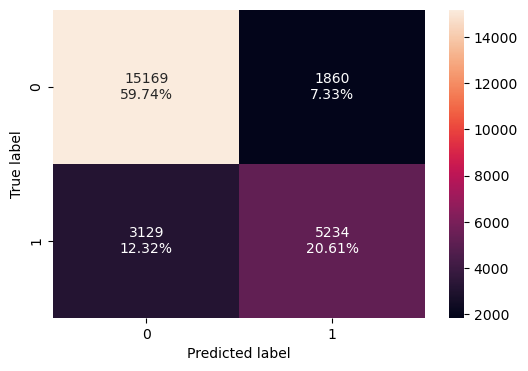

In [2891]:
confusion_matrix_statsmodels(lg, X_train, y_train)

**Observations**

- *The `f1_score and recall` of the model are `~0.68 `and  `0.625`respectively which is `less` and we will try to maximize it further.*

- *The variables used to build the model might contain multicollinearity, which will affect the p-values.*

- *We will have to `remove multicollinearity` from the data to get `reliable coefficients and p-values`.*

### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the `Variation Inflation Factor (VIF)`.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [2895]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns  

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [2896]:
checking_vif(X_train)  ## call fn to check VIF on train data

feature       VIF
0                                  const 329.62815
1                           no_of_adults   1.34960
2                         no_of_children   2.09264
3                   no_of_weekend_nights   1.06814
4                      no_of_week_nights   1.09565
5             required_car_parking_space   1.03979
6                              lead_time   1.24636
7                          arrival_month   1.05388
8                           arrival_date   1.00678
9                         repeated_guest   1.78142
10          no_of_previous_cancellations   1.39457
11  no_of_previous_bookings_not_canceled   1.64730
12                    avg_price_per_room   1.95320
13                no_of_special_requests   1.24608
14         type_of_meal_plan_Meal Plan 2   1.20454
15         type_of_meal_plan_Meal Plan 3   1.02525
16        type_of_meal_plan_Not Selected   1.23729
17        room_type_reserved_Room_Type 2   1.10514
18        room_type_reserved_Room_Type 3   1.00324
19        room_type_reserved_Room_Type 4   1.36022
20        room_type_reserved_Room_Type 5   1.02756
21        room_type_reserved_Room_Type 6   2.04697
22        room_type_reserved_Room_Type 7   1.11791
23     market_segment_type_Complementary   4.50229
24         market_segment_type_Corporate  16.90205
25           market_segment_type_Offline  63.95309
26            market_segment_type_Online  71.05727

**Observation**

- *Except for `dummy variables and constant`, we do not see VIF value greater than 5 and `all the VIF is under 5 for all the predictors`, suggesting there is `no multicollinearity` present in the data.*

#### Dropping high p-value variables

- *We will `drop the predictor variables having a p-value greater than 0.05` as they do not significantly impact the target variable.*
- *we can see `high p-values` in independent variables like `arrival_date, no_of_previous_bookings_not_canceled `*
- *There are also `high p-values present` in some of the `dummies variables.`*    

**Lets create a functions to treat this high p-values using loops to make the code more efficient i.e p-values >.05**

- *Build a model, check the p-values of the variables, and drop the column with the highest p-value.*
- *Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.*
- *Repeat the above two steps till there are no columns with p-value > 0.05.*

In [2900]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


- *Specify the `new train data `for `selected predictors`(after dropping columns showing multicollinearity and high p-values)*

In [2902]:
#specify the train data from which to select the specified columns
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

**Build logistic regression: model-2**

In [2904]:
# fitting logistic regression model with new train data (X_train1)
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit() 

#print summary of the model-2 (lg1)
print(lg1.summary()) 

Optimization terminated successfully.
         Current function value: 0.426892
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 14 Feb 2025   Pseudo R-squ.:                  0.3264
Time:                        21:47:11   Log-Likelihood:                -10840.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.9607      0.107    -27.598     

**Observation**

- *All `high p-values are removed` and no independent variable has p-value greater than 0.05.*
- *We'll consider the features in `X_train1` as the final set of predictor variables and `lg1`as the final model to move forward to check the model performance.*

### Coefficient Interpretations

####  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [2908]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds          0.05178       1.10071         1.17712               1.11654   
Change_odd% -94.82178      10.07066        17.71183              11.65406   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04314                     0.19759    1.01641   
Change_odd%            4.31366                   -80.24128    1.64077   

             arrival_month  repeated_guest  no_of_previous_cancellations  \
Odds               0.93968         0.06696                       1.25479   
Change_odd%       -6.03200       -93.30408                      25.47891   

             avg_price_per_room  no_of_special_requests  \
Odds                    1.02079                 0.23311   
Change_odd%             2.07907               -76.68889   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.41813                         0.68898   
Change_odd%                        41.81306                       -31.10243   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.76966                         0.49434   
Change_odd%                       -23.03420                       -50.56582   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.34829                         0.22142   
Change_odd%                       -65.17085                       -77.85797   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.44498                      0.16319  
Change_odd%                      -55.50182                    -83.68106

**Observation on Coefficient interpretations**

- *Coefficient of `no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room and type_of_meal_plan_Not Selected` are **`positive`** an `increase in these` will lead to `increase` in chances of a booking getting cancelled.*
  
- *Coefficient of `required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, some levels of room_type_reserved and market segments ` are **`negative`** and `increase in these` will lead to `decrease` in chances of a booking getting cancelled.*
  
- *`no_of_adults`:Holding all other features constant `one unit change in no_of_adults will increase` the odds of a `booking getting cancelled by 1.1 times` or `10 %` increase in odds*.
- *`no_of_children`:Holding all other features constant `one unit change in no_of_children will increase` the odds of a booking getting cancelled by `~1.18 times or 18 % increase in odds of booking getting cancelled`*.
  
- *`lead_time`:Holding all other features constant one unit change in `lead_time will increase` the odds of a `booking getting cancelled by ~1.01 times or 1.64 % `increase in odds of booking getting cancelled*.
- *`type_of_meal_plan_Not Selected`: Holding all other features constant one unit change in `type_of_meal_plan_Not Selected` will increase the odds of a booking getting cancelled when compared to some meal_plan selected by `~1.42 times or 42 % increase in odds of booking getting cancelled`*[keeping all the other categorical levels of meal plan category as a reference].
  
- *`required_car_parking_space`: Holding all other features constant `one unit change in required_car_parking_space` will `decrease the odds of a booking getting cancelled by ~0.2 times or 80 % `decrease in odds of booking getting cancelled*.
  
- *`repeated_guest`: Holding all other features constant `one unit change in repeated_guest` will `decrease the odds of a booking getting cancelled by ~0.1 times or 93 % `decrease in odds of booking getting cancelled*.

- *`market_segment_type_Offline`: Holding all other features constant one unit change in `type_of_meal_plan_Not Selected` will decrease the odds of a booking getting cancelled when compared to market segment Online, selected by `0.16 times or ~84 % decrease in odds of booking getting cancelled`*[keeping all the other categorical levels of market segment(except corporate) category as a reference].

 `Interpretation for other attributes can be done similarly.`


### Checking performance of the final model

**Model performance of `final model (lg1)` on the `training set(X_train1)`**

In [2912]:
#call the fn to check performance on X_train1 and y_train
print("Training performance:")
model_performance_classification_statsmodels(lg1,X_train1,y_train) 

Training performance:


Accuracy  Recall  Precision      F1
0   0.80399 0.62621    0.73885 0.67788

**Confusion Matrix**

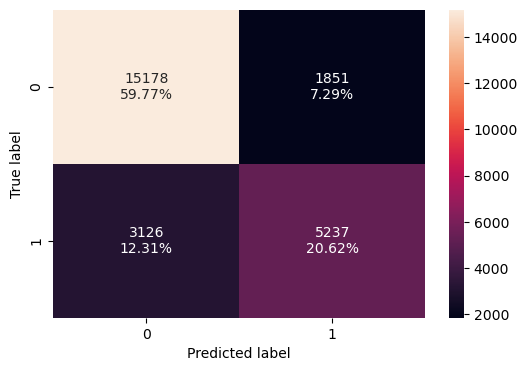

In [2914]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

**Observation**

- *we do not see much improvement in model performance after removing high p-values the `recall (0.626)and f1 score (0.6778)` are `almost same`.*

**let see if we can improve the recall by changing the threshold.**


### Model Performance Improvement

* Let's see if the `f1_score` can be improved further by changing the model threshold
* First, we will `check the ROC curve`, compute the area under the ROC curve (ROC-AUC), and then use it to `find the optimal threshold`.
* Next, we will `check the Precision-Recall curve` to find the `right balance` between `precision and recall` as our metric of choice is f1_score.

#### ROC-AUC
* ROC-AUC on training set

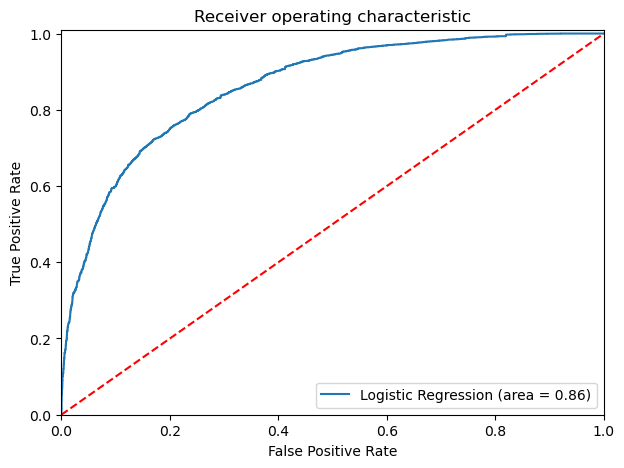

In [2919]:
#plot ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1)) #using final model(lg1) and train data(X_train1)
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- *Model is performing well on the training set with `score of 0.86`(logistic regression(area=.86).*

**The value ranges from `0(worst model)` to `1(perfect)`.**

#### Optimal threshold using AUC-ROC curve

In [2922]:
# Find Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3083581774487328


- *Using `AUC-ROC curve`, Optimal threshold value is `~.31`(i.e. optimal_threshold_auc_roc)*

**Checking model performance on training set**

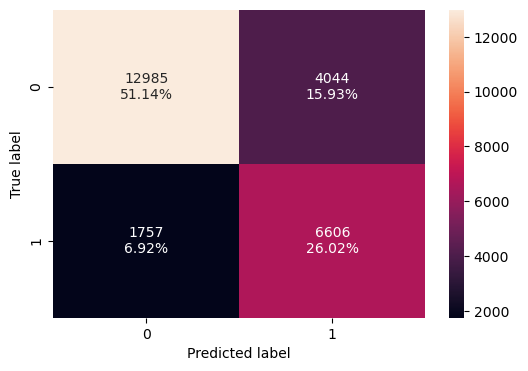

In [2925]:
## Call the fn to create the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1,y_train,threshold=optimal_threshold_auc_roc) 


In [2926]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.77154 0.78991    0.62028 0.69489

- *We can see the `Recall is improved significantly` and increase to `(0.63 to ~0.79).`*
- *The Precision`(0.74 to 0.62)` and Accuracy`(0.80 to 0.77)` are `decreased`*
- *Slight improvement in `f1 score(0.677 to 0.69).`*

#### Let's use Precision-Recall curve and see if we can find a better threshold

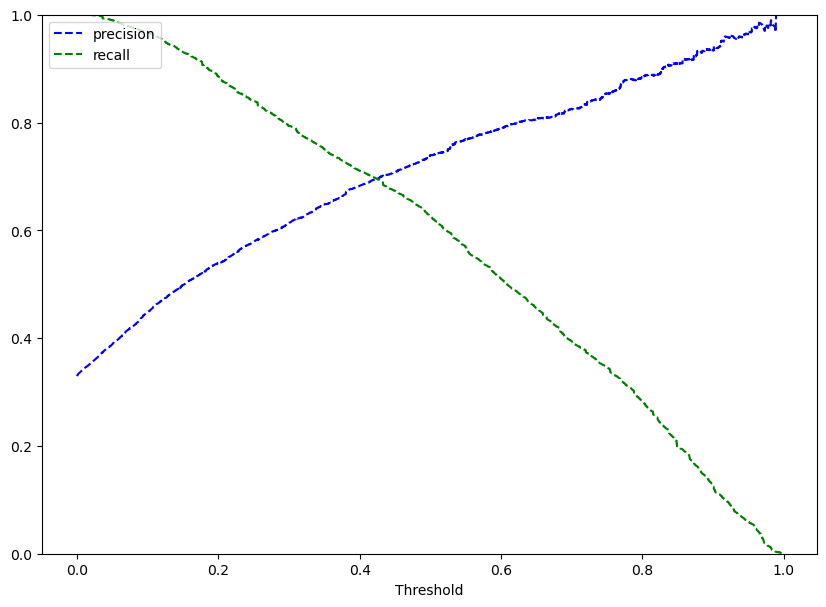

In [2929]:

y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Setting the threshold using `Precision-Recall curve` above

In [2931]:
# setting the threshold using Precision-Recall curve above
optimal_threshold_curve = 0.42

#### Checking model performance on training set

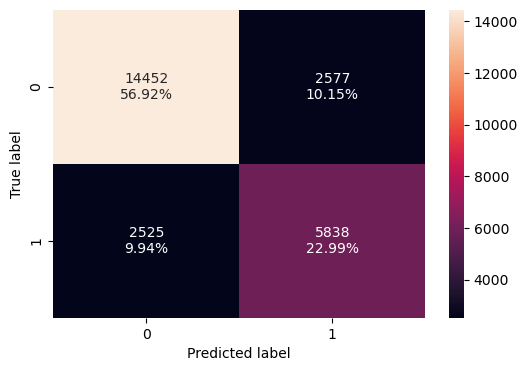

In [2933]:
# creating confusion matrix using the threshold calculated by Precision-Recall curve 
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve) 


In [2934]:
#call the fn to check Training performance using optimal_threshold_curve
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

#print
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.79907 0.69807    0.69376 0.69591

**Observation**

- *We can observe that `Recall,Precision and f1 score` are `almost same.`*
- *`Recall value is decrease`, whereas other metrics are almost same from previous model.*

- Lets check the performance on Test set.

#### Let's check the performance on the test set

**Test set performance**

- *We have to first drop the columns from the test set that were dropped from the training set.*

In [2938]:
# test set 1 with dropped columns
X_test1 = X_test[list(X_train1.columns)]

**Using model with default threshold(0.5)**

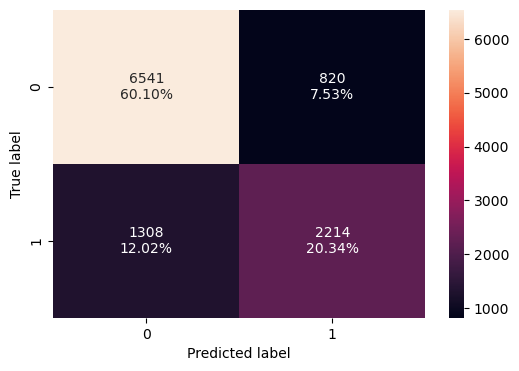

In [2940]:
# creating confusion matrix for X_test1 and y_test using default threshold
confusion_matrix_statsmodels(lg1,X_test1,y_test) 

In [2941]:
 ## Call function to check performance on X_test1 and y_test with default threshold

log_reg_model_test_perf = model_performance_classification_statsmodels(lg1,X_test1,y_test)
print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80447 0.62862    0.72973 0.67541

**Observation**

- *Performance is almost `same and comparable` on both `train and test sets`,therefore the model is `not overfitting`.*
- *The model is giving a `good f1_score of 0.677 and 0.675` on the train and test sets respectively.*


**ROC curve on test set**

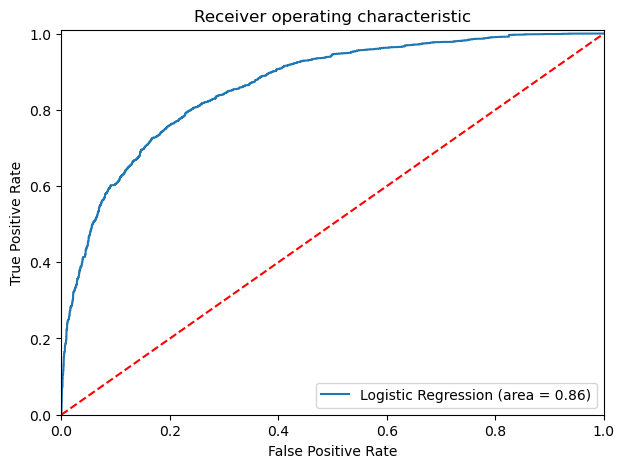

In [2944]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [2945]:
print(optimal_threshold_auc_roc)

0.3083581774487328


**Using model with `threshold=0.31`(optimal_threshold_auc_roc)**

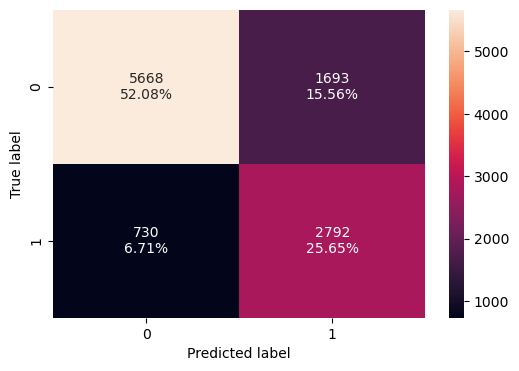

In [2947]:
# creating confusion matrix for X_test1 and y_test using optimal_threshold_auc_roc as threshold

confusion_matrix_statsmodels(lg1, X_test1,y_test,threshold=optimal_threshold_auc_roc) 

In [2948]:
# checking model performance for this model[using optimal_threshold_auc_roc as threshold]
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.77736 0.79273    0.62252 0.69739

In [2949]:
print(optimal_threshold_curve)

0.42


**Using model with threshold = 0.42 (`Precision-Recall curve` )**

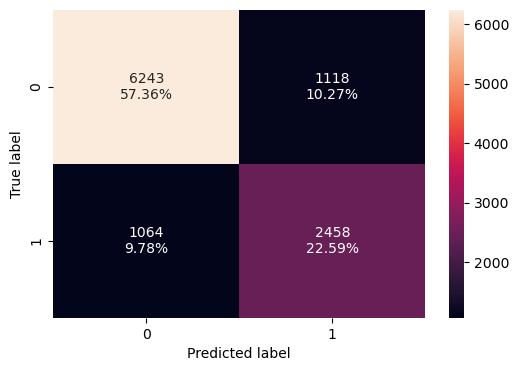

In [2951]:
# creating confusion matrix for X_test1 and y_test using optimal_threshold_curve as threshold

confusion_matrix_statsmodels(lg1, X_test1, y_test,threshold=optimal_threshold_curve ) 

In [2952]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.79950 0.69790    0.68736 0.69259

### Model Performance summary

#### Model Performance Comparison - Training

In [2955]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80399   
Recall                                   0.62621   
Precision                                0.73885   
F1                                       0.67788   

           Logistic Regression-0.31 Threshold  \
Accuracy                              0.77154   
Recall                                0.78991   
Precision                             0.62028   
F1                                    0.69489   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79907  
Recall                                0.69807  
Precision                             0.69376  
F1                                    0.69591

#### Model Performance Comparison - Test

In [2957]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80447   
Recall                                   0.62862   
Precision                                0.72973   
F1                                       0.67541   

           Logistic Regression-0.31 Threshold  \
Accuracy                              0.77736   
Recall                                0.79273   
Precision                             0.62252   
F1                                    0.69739   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.79950  
Recall                                0.69790  
Precision                             0.68736  
F1                                    0.69259

**Observation**

- *All the `three models` are `performing well on both training and test` data` without` the problem of `overfitting`.*
  
- *The `f1-score `is slightly better for model with `threshold(0.31 and 0.42)` when compared with default threshold(0.5).*
  
- *`Recall is high` when the threshold is set to `0.31`.High recall can help the hotel in minimizing losses due to booking cancellations by identifying the customers who will cancel booking.*
  
- *The model with a `default threshold (0.5)` is giving the `high Accuracy and Precision`.*
  
- *The model with `0.42 threshold` have `balanced metrics` i.e. `Recall,Precision and f1-score almost same` and high accuracy.*
- *We will choose `Logistic Regression-0.31 Threshold model` since it's giving highest recall and f1-score and other metrics like accuracy and Precision are comparable*.

#### Lets build another model with different algorithm (Decision Tree) to check if it can give better performance.

## Decision Tree

- We want to predict which bookings will be canceled and identify factors the that significantly influence it.
- There are few checks we need to perform before proceeding with model building.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [2962]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  float64
 2   no_of_children                        36275 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  float64
 4   no_of_week_nights                     36275 non-null  float64
 5   required_car_parking_space            36275 non-null  float64
 6   lead_time                             36275 non-null  float64
 7   arrival_month                         36275 non-null  float64
 8   arrival_date                          36275 non-null  float64
 9   repeated_guest                        36275 non-null  float64
 10  no_of_previous_cancellations          36275 non-null  float64
 11  no_of_previous_

### Data Preparation for Modeling(Decision Tree)

In [2964]:
#independent(predictors) variable
X=h_data.drop(['booking_status'], axis=1)

#dependent(target) variable
y = h_data['booking_status']

#create dummies
X = pd.get_dummies(X, drop_first=True)

#converting to datatype of all columns to float
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#print the results
print('Shape of Training set : ', X_train.shape)
print('Shape of test set : ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (25392, 26)
Shape of test set :  (10883, 26)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


- *Train and Test set is created with  `ratio 70:30 `with random_state = 1.*
- *We can also observed that the `class is imbalanced`(class 0=67% and class 1=33%) in both train and test set) and for result to be not biased we have to balanced the class weights.*

**Note**
- *Since the decision tree is a non-linear model, it is not affected by multicollinearity.*
- *It is always a good practice to set `drop_first = True` in all the models. However, in the case of non-linear models like decision trees, this step is not mandatory.*

#### First, let's create functions to calculate different metrics and confusion matrix to reuse the same code repeatedly for each model.

* The `model_performance_classification_sklearn` function will be used to `check the model performance` of models.
* The `confusion_matrix_sklearnfunction` will be used to `plot the confusion matrix`.

In [2967]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # to compute Accuracy
    acc = accuracy_score(target, pred)  

    # to compute Recall
    recall = recall_score(target, pred)  

    # to compute Precision
    precision = precision_score(target, pred)  

    # to compute F1-score
    f1 = f1_score(target, pred)  

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 
         'Recall': recall, 
         'Precision': precision, 
         'F1': f1,},
        index=[0],
    )

    return df_perf

In [2968]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Building Decision Tree Model

In [2970]:
# fit the decision tree on train data
model = DecisionTreeClassifier(random_state=1) 
model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

**Confusion matrix for default**( i.e. the tree grows until all leaves are pure)

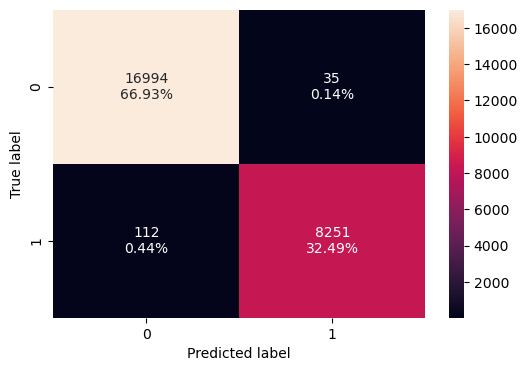

In [2973]:
# create confusion matrix for train data
confusion_matrix_sklearn(model,X_train,y_train) 

In [2974]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

#### Checking model performance on test set

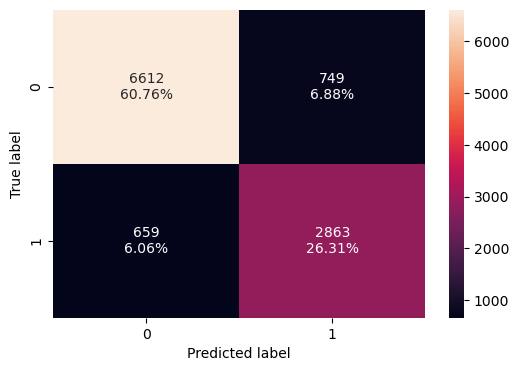

In [2976]:
# create confusion matrix for test data
confusion_matrix_sklearn(model, X_test,y_test) 

In [2977]:
# check performance on test set
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test,y_test) 
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87062 0.81289    0.79264 0.80264

**Observation**

- *We can see from above results the `model is performing perfectly on training set` i.e. all metric(Accuracy,recall,Precision and f1-score) are `almost 1,` classifying each data points correctly.*
  
- *We can also observe a `huge difference` in performance of model on `training and test set`,suggesting that the model is `suffering from overfiiting`.*
  
- *A `complex tree with no restrictions` applied, will learn all the patterns in the training set capturing  all the information and noise. They will perform very well on training set but fail to perform well on test set because of `overfiiting` issue.*
  
- *Therefore to `improve performance of model` on test set we need to apply `pruning techniques` on the trees(either `pre-pruning or post pruning`).*

**Before pruning the tree let's check the important features.**

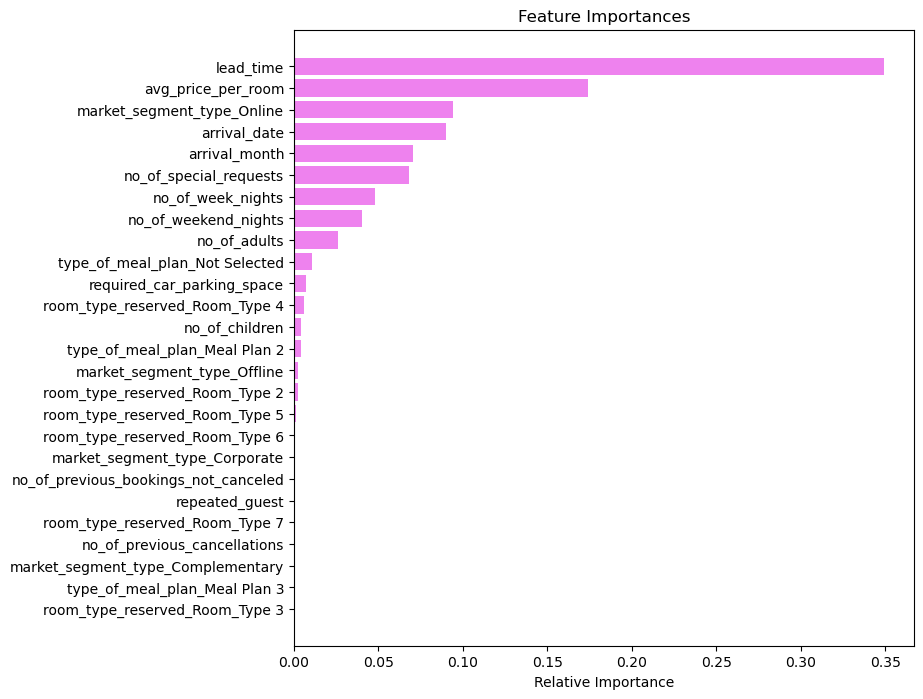

In [2980]:
feature_names = list(X_train.columns)                  #get the feature(X train columns name)
importances = model.feature_importances_
indices = np.argsort(importances)                      #sort features based on importance(highest to lowest)

#plot
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

- *The important features affecting the tree before pruning are `lead_time, avg_price_per_room, market_segment_type_online, arrival_date, arrival_month etc`.*
  
- *`lead_time` is the `most important feature` for predicting the booking cancellation in this tree.*
- *Since the `tree is very complex` and we have already observed `overfitting issues`, lets `prune the tree` for better model performance*

#### Do we need to prune the tree?

- *Yes its very important to prune the tree for better performance on Train and test data. complex tree will capture information  plus noise and will perform badly on test.*

### Decision Tree (Pre-pruning)

**Using `GridSearch` for Hyperparameter tuning of our tree model**

* `Hyperparameter tuning` is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* `Grid search` is a `tuning` technique that attempts to `compute` the `optimum values of hyperparameters`. 
* It is an `exhaustive search` that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [2986]:
# Choose the type of classifier.

estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced") 

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),      #to select max_depth from range  2-7 step of 2 i.e(2,4,6)
    "max_leaf_nodes": [50, 75, 150, 250], 
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)


- *As we have observed earlier  that `class is imbalanced` here(class 0=67% and class 1=33%) in both train and test set) and for result to be not biased we have to balanced the class weights.*
- *`class_weight = "balanced",` will automatically adjust the weights to be inversely proportional to the class frequencies in the input data.*
- *The  `grid search` provided the `best combination of parameters` and can be seen in the output above.*


#### Checking performance on training set- using grid search(estimator)

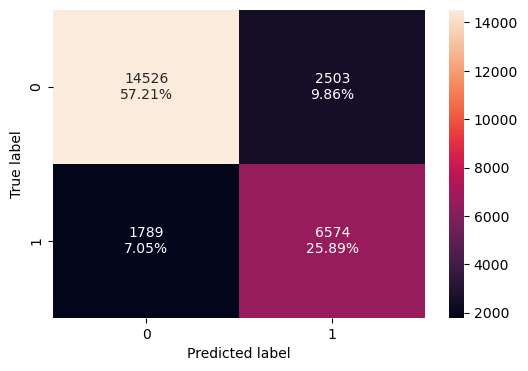

In [2989]:
# create confusion matrix for train data
confusion_matrix_sklearn(estimator, X_train, y_train) 

In [2990]:
# check performance on train set
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) 
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

#### Checking performance on test set

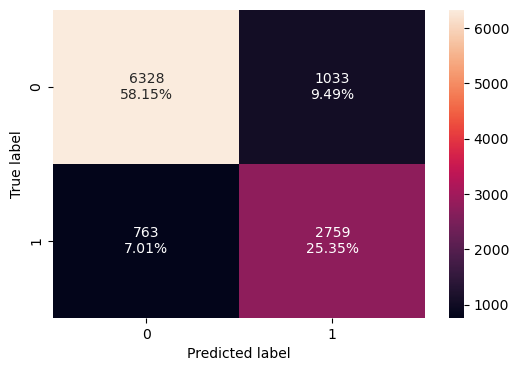

In [2992]:
# create confusion matrix for test data
confusion_matrix_sklearn(estimator,X_test,y_test) 

In [2993]:
 # check performance on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

**Observation**

- *The model is giving a `generalized result` now since `all the metrics(Accuracy,Recall,Precision and f1-score)` on both the `train and test` data are `almost same`,suggesting the model is able to generalize well on unseen data and `not suffering from overfitting`*.
  
- *Model is also giving a `high Recall(0.78)` and good f1-score(0.75) on test.*

#### Visualizing the Decision Tree

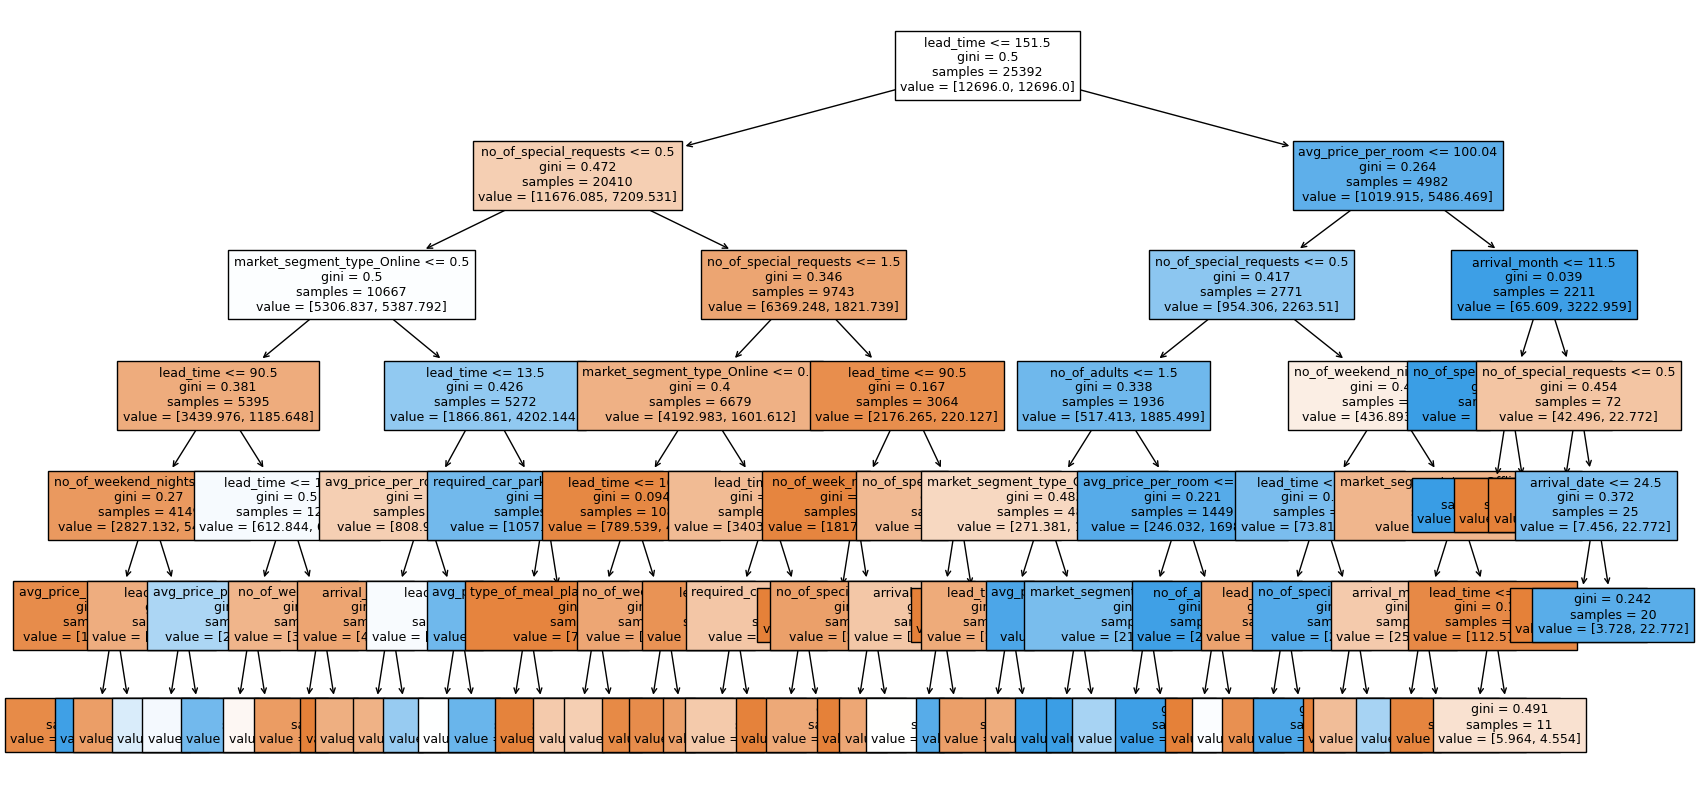

In [2996]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [2997]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

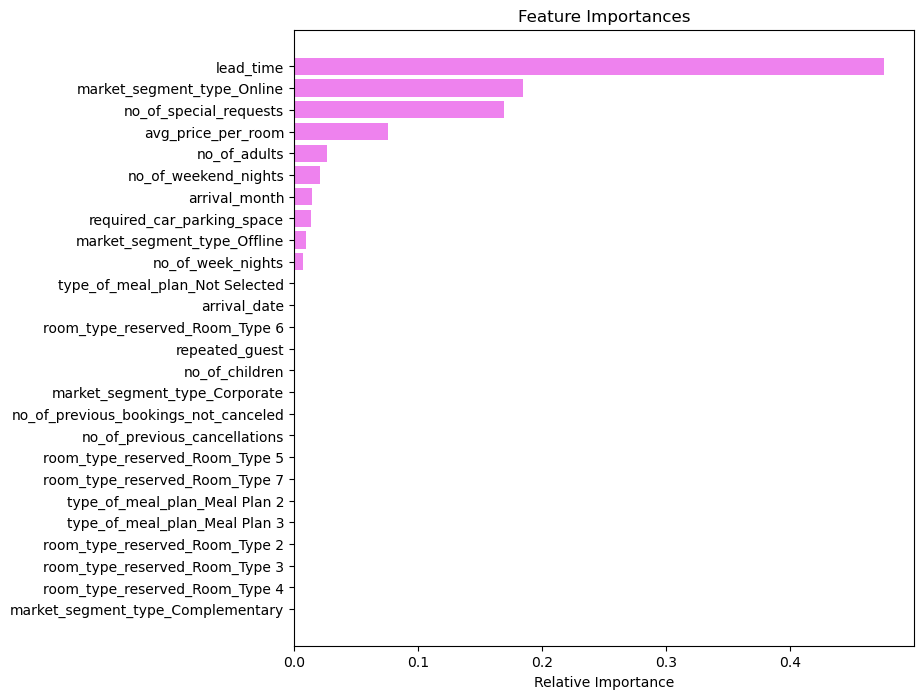

In [2998]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

- *The `lead-time` is still the `most important variables` followed by `market segment online` and `number of special request` after pre- pruning.*
- *We also noticed `avg_price_per_room` which is the second most important feature have moved down to 4th, while market segment online and number of special request moved up.*
- *The `arrival date` has now become `insiginificant`.*
- *We can see few changes in selection of important features after pre pruning the tree.*
  
**Using the above extracted decision rules we can make interpretations from the decision tree model like:**

- *If the `lead_time  <= 151.50 ` with `no special request` and the `market segment not belongs to online(i.e <=0.5 and belongs to other segment)`, then if the `lead_time` is less than or equal to 90.50 with `no weekend nights` and `average price per room is <= 196.5` then the `booking `is most likely will `not get canceled(class 0)` otherwise it will be `Canceled(Class 1).`*

`Interpretations from other decision rules can be made similarly`

### Decision Tree (Post pruning)

**Cost Complexity Pruning**

Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

- *`Minimal cost complexity` pruning recursively finds the node with the `"weakest link".`*
- *The `weakest link` is characterized by an `effective alpha`, where the `nodes` with the `smallest effective alpha` are `pruned first`*.
   
- *Using `scikit-learn` provides`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process.*
- *As alpha increases, more of the tree is pruned and also increases the total impurity of its leaves.*

In [3004]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities  # returns the effective alphas & impurities

In [3005]:
pd.DataFrame(path) #creating Dataframe for plot

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1852     0.00890     0.32806
1853     0.00980     0.33786
1854     0.01272     0.35058
1855     0.03412     0.41882
1856     0.08118     0.50000

[1857 rows x 2 columns]

- *A `fully grown tree` (i.e complex tree) has a `ccp_alpha of 0 (or very low)`, meaning `no pruning` has been applied yet, with least impurities*
- *As the `alphas increases` more of the tree is pruned and tree become simpler, `reducing overfitting`*.

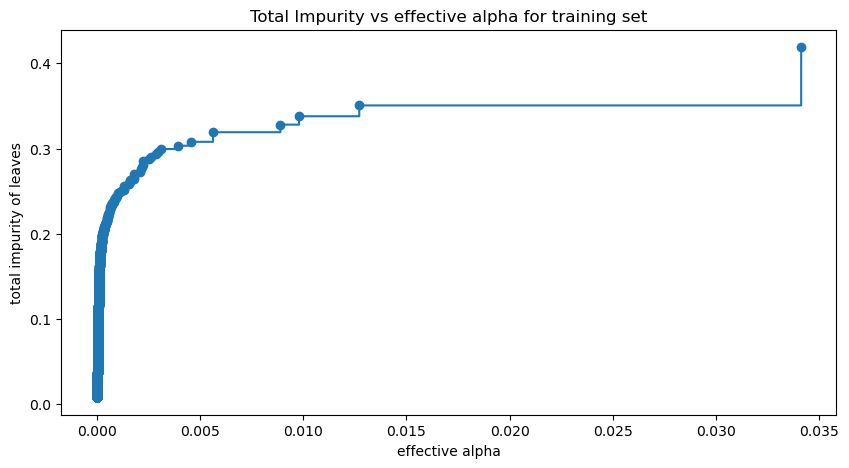

In [3007]:
#plot to show relation between effective alpha and total impurity of leaves
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- *Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.*

In [3009]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    # fit decision tree on training data
    clf.fit(X_train, y_train) 
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137171


- *For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.*

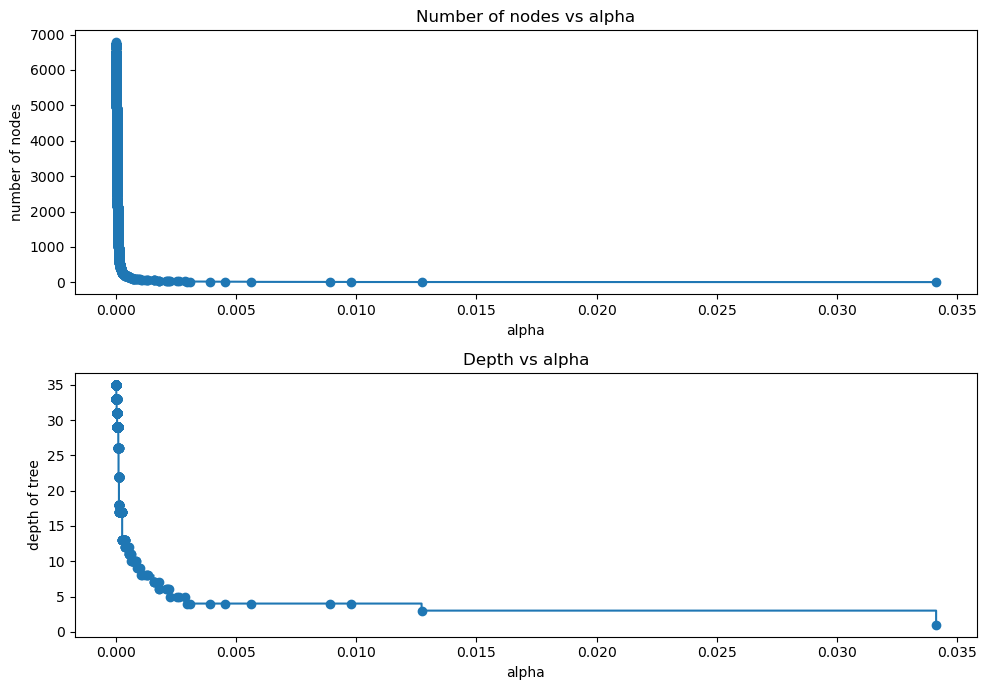

In [3011]:
#removing the last element in `clfs` and `ccp_alphas`
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]   #calculate node count
depth = [clf.tree_.max_depth for clf in clfs]

#sub plot for Number of nodes and depth wrt alpha 
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

#subplot2 -Depth vs alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- *number of nodes and tree depth decreases as alpha increases.*

#### Recall vs alpha for training and testing sets-`High Recall Model`

In [3014]:
#recall train
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)
    
#recall Test
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

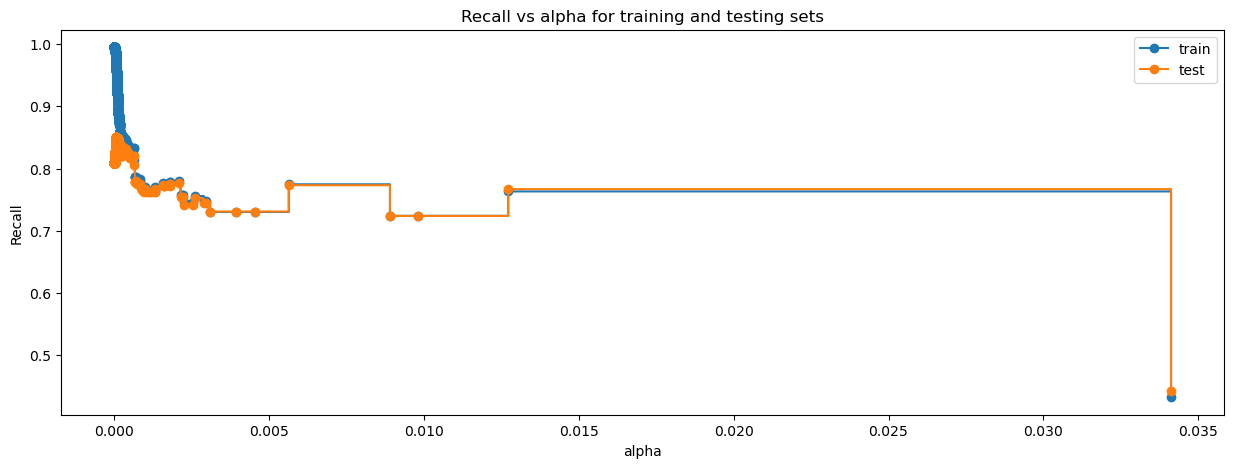

In [3015]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Post pruning with High recall Model**

In [3017]:
# creating the model where we get highest train and test recall
index_best_model_Recall = np.argmax(recall_test)
best_model_recall = clfs[index_best_model_Recall]
print(best_model_recall)

DecisionTreeClassifier(ccp_alpha=7.163525107086766e-05, class_weight='balanced',
                       random_state=1)


**confusion matrix for high recall train data**

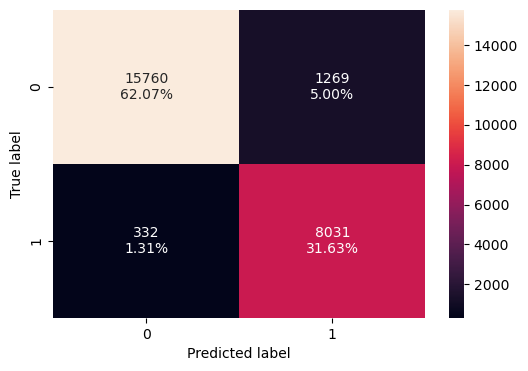

In [3019]:
#confusion matrix  where we get highest train and test recall
confusion_matrix_sklearn(best_model_recall, X_train, y_train)

In [3020]:
#Model performance for high recall train data
decision_tree_post_perf_train_recall = model_performance_classification_sklearn(
    best_model_recall, X_train, y_train
)
decision_tree_post_perf_train_recall

Accuracy  Recall  Precision      F1
0   0.93695 0.96030    0.86355 0.90936

**confusion matrix for high recall test data**

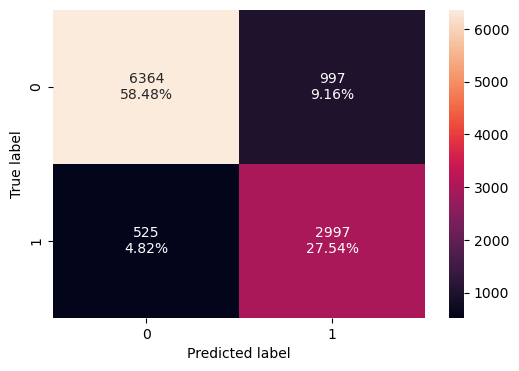

In [3022]:
confusion_matrix_sklearn(best_model_recall, X_test, y_test)

In [3023]:
#Model performance for high recall test data
decision_tree_post_test_recall = model_performance_classification_sklearn(
    best_model_recall, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86713 0.84327    0.76863 0.80422

#### F1 Score vs alpha for training and testing sets-`High f1 score Model`

In [3025]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

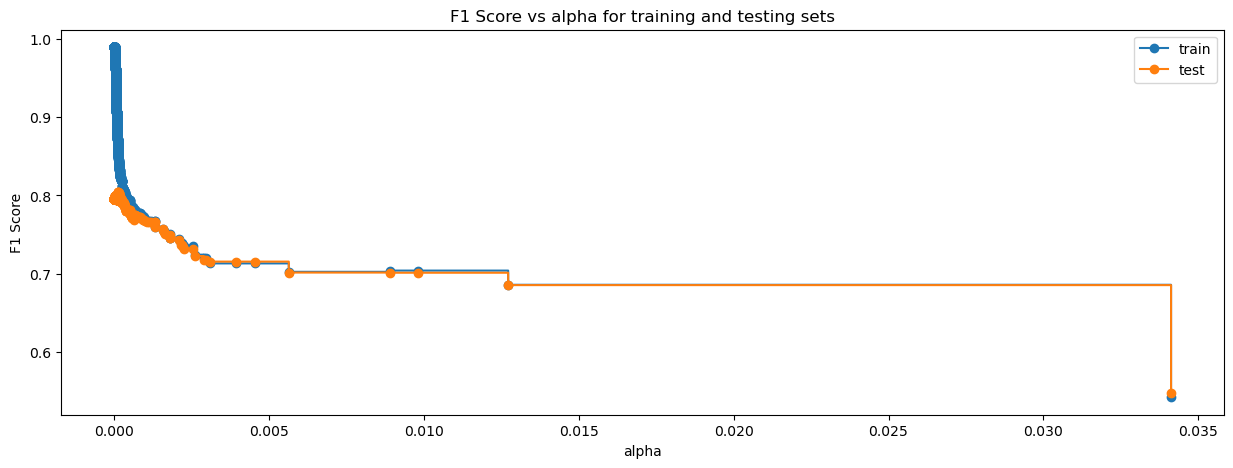

In [3026]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [3027]:
#on high f1 score 
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00013156455238234454,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

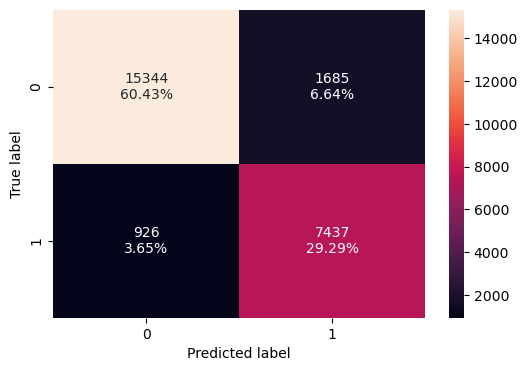

In [3029]:

confusion_matrix_sklearn(best_model, X_train, y_train)

In [3030]:
#Model performance for high f1-score train data
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89717 0.88927    0.81528 0.85067

#### Checking performance on test set

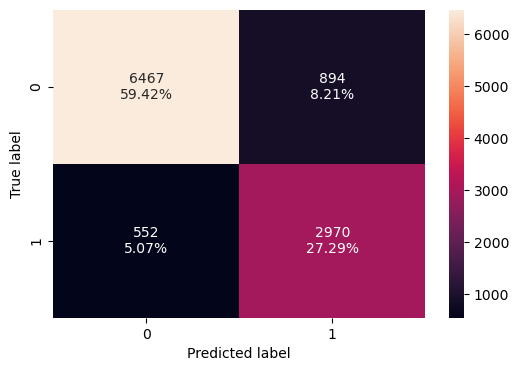

In [3032]:
#create confusion matrix for test data on best model with high f1-score
confusion_matrix_sklearn(best_model, X_test, y_test) 

In [3033]:
#Model performance for high f1-score test data
decision_tree_post_test = model_performance_classification_sklearn(best_model, X_test, y_test) 
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86713 0.84327    0.76863 0.80422

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**

- *As observe earlier, The `lead-time` and `market segment online` are still the `most important variables` after post pruning.*
  
- *We can also notice `avg_price_per_room` more important feature in post pruned tree compared to `number of special request`*
- *The `arrival date` which was `insiginificant` in pre pruning has become significant again*
- *`Other significant variables` are arrival month, no of adults ,number of week and weekend nights etc making impact on bookings.*  


#### Comparing Decision Tree models

#### Decision tree training performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        decision_tree_post_perf_train_recall.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning-f1(score))",
    "Decision Tree (Post-Pruning-High Recall)",
]
print("Training performance comparison:")
models_train_comp_df

#### Decision tree testing performance comparison

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
        decision_tree_post_test_recall.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning- F1 score)",
    "Decision Tree (Post-Pruning-High Recall)",
]
print("Test set performance comparison:")
models_test_comp_df

### Comparing all the decision tree models

**Observation**

- *We have created `4 models for decision tree` -first `one with default value`, `second` one with `Pre-pruning`, `third` one with `Post-Pruning with high f1-score`, `fourth` with `Post pruning(high recall).`*
  
- *The `default decision tree` model was performing perfectly on training data(almost 1 for all metrics), but `poorly on test data` causing `overfiiting issues` and hence we cannot select this model.*
  
- *Both `Decision Tree (Pre-Pruning) `and `Post pruning(F1-score)` are performing well on Train and Test data, but the metric scores for `recall, accuracy, precision and f1 score` are `higher in Post pruning(F1- score)`.*
  
- *The last model `Post pruning(high recall) `is giving the `highest recall value on train and test` but we also bserve a `huge difference` in performance of model on `training and test set` , suggesting overfitting.*
  
- *Therefore we will `choose` the `post pruned(f1-score) decision tree` model as the `best model` since it is giving a high score on the both train and test sets for all metrics.*

## Compare decision tree and Logistic regression models 

In [ ]:
#Best model selected from decision and Logistic

# testing performance comparison of best Decision and logistic model

diff_models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf_threshold_auc_roc.T,
        decision_tree_post_test.T,
        
    ],
    axis=1,
)
diff_models_test_comp_df.columns = [
    
   
    "Logistic Regression-0.31 Threshold",
    "Decision Tree (Post-Pruning- F1 score)",
   
]
print("Best Model (Decision and logistic) Test set performance comparison:")
diff_models_test_comp_df

## Final Model Summary

**Observation**

- *`Both Decision tree and Logistic regression` models are giving good performance on Train and test data.*
  
- *While predicting the booking cancellation in Logistic regression  the features like `no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room and type_of_meal_plan_Not Selected` are `positively correlated.`*
  
- *And `required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, some levels of room_type_reserved and market segments ` are **`negatively`** correlated*.
  
- *`These features` were `also important in Decision tree` while predicting the booking cancellation. i.e. the `lead_time`, `market segment online`, avg_price_per_room,number_of_special_request,arrival_month etc as observed earlier.*
  
- *`Comparing the different metric (Accuracy,Recall,Precision and F1 score)`, the `Decision Tree (Post-Pruning- F1 score) `is giving the `highest` values for all the metrics(as seen above on test data set).*
  
- *Therefore we will choose the `Decision Tree (Post-Pruning- F1 score)` as our **`final best model`** .*

## Actionable Insights and Recommendations

**Insight:**

`INN Hotels Group` has a chain of hotels in Portugal who are facing problems with the `high number of booking cancellations` due to various factors. These cancellations are impacting the hotel on various fronts -like Loss of resources (revenue) when it cannot resell the room, Additional costs for advertisement/publicity/commisions through different distribution channels to help sell these rooms, lowering room prices at the last minute, resulting in reducing the profit margin and unnecessary works for hotel staff for making arrangements for guests.

The `dataset` we have analyzed here consist of `approx 38k hotel booking details of the customers`. They contains informations about the `booking details for the year(2017- 2018)`.It include details on guest counts (adult and children), guest arrival month and date, number of week and weekend nights it's booked for, how much in advance it's booked. Do the guest have any special meal plan ,car space or special request requirements? what kind of room is booked. is the customer a repeating or new customers.

The main idea here is to analyze the data provided to find which factors have a high influence on booking cancellations and then `build a predictive model` that can `predict which booking is going to be canceled in advance`, and help in formulating profitable policies for cancellations and refunds.

We have perform  `data analysis`(`Exploratory Data Analysis(EDA)`), `Data Preprocessing` and build a `(Logistic regression and decision tree best models)` to `predict the booking cancellations in advance` and identify the factors that significantly influence it.`

**Below are the conclusions and recommendation from our analysis**.


*From the `sample dataset of INN hotel` and the `final model built`, we were able to `conclude that`,*

- *The model built can be used to predict if the booking will be canceled or not and can correctly `identify 84.0% of booking cancellation (recall).f1 score of .80 means `it's relatively strong in both identifying cancellations correctly and avoiding too many false positives(i.e balance between recall and precision).*

- *features like `lead_time, market segment, number of special request, avg price per room,number of adults, arrival month/date, number of week and weekend nights, required parking space , meal plan not selected` are the `important` for predicting booking cancellations.*

- *The booking are `more likely to canceled` if it's done in `too many days in advance`, i.e lead time more over 100 days.*
- *In terms of booking cancelled, `Online bookings(~37 %)` cancellation are `more` followed by `offline(~30 %) and Aviation(~ 29.6%)`.*

- *Chances of booking getting canceled is less for the `Customers with 3 or more special requests`*
- *Number of cancellation` made by `repeated customers` are `very less` when compared to `new customers`, suggesting loyal customers who likes the hotel services provided during their stay*.
  
- *Cancellation is more` when `family members are more` i.e adult travelling with more number of kids, compared to couples or solo.*
  
- *Most of the `bookings are canceled` when the `stay `is booked for `longer periods( more than a week)`.*
  
- *Most of the booking are done in the `month of October(approx 15 %) highest` followed by `September ( ~13 %)` and `August(~11 %)`.*
  
- *Most of the guests belongs to `Online segment(23214 bookings i.e approx 64 %)` followed by `offline( 29%) and Corporate(~6 %)`.*



#### **Recommendations**

- *We saw if the booking are done in too many days in advance the chances of it getting it cancel is more.few rooms can be overbooked to avoid revenue loss by last minute booking cancellations*.
  
- *To reduce last minute booking set the cancellation deadlines (48-72 hr) and add a cancellation charge if booking is cancelled 24 hr before, so that hotels have enough time to resell these rooms.*
  
- *Repeated customers are loyal customers and we observed less booking was canceled by them. Though there presence are little low. By offering them rewards points or special fare discount on anniversay will be good way of building relationship and boosting revenues.*
  
- *We saw booking was done less for family based customers, by providing extra services(gym/pool/play area/daycare services) and catering to their needs will attract more family based customers.*
- *Offer lower prices for non-refundable bookings, promotional offer and discount during low seasons, will generate revenue in low season too.*
- *Better guest experiences during stay at hotel and positive feedback/ reviews on hotel and websites will boost hotel revenue and attract new customers.* 